# Predicting Wine Ratings Using Machine Learning & NLP
Jelena Capin ([LinkedIn](https://www.linkedin.com/in/jelena-capin))<br>
[BrainStation](https://www.brainstation.io) Capstone Project<br>
Aug 2022

# Table of Contents

Part 1: [Introduction & Exploratory Data Analysis](#pt1) <br>
1.1 - [Introduction](#intro) <br>
1.2 - [High level description of data & EDA](#eda)<br>
1.3 - [Important notes & preliminary insights from EDA](#notes) <br>

Part 2: [Data Cleaning & Preprocessing](#pt2)<br>
2.1 - [Dealing with duplicates](#dup)<br>
2.2 - [Splitting data](#split) <br>
2.3 - [Dealing with nulls](#null) <br>
2.4 - [Feature Engineering](#feat) <br>
2.5 - [Encoding Categorical Features](#encode) <br>
2.6 - [Vectorizing Text Data](#vector) <br>

Part 3: [Modeling & Model Optimizing](#pt3) <br>
3.1 - [Baseline models](#base) <br>
3.2 - [Final models](#fin) <br>

Part 4: [Conclusion & Next Steps](#pt4)<br>
4.1 - [Final insights, next steps, and conclusion](#next)

---

<a id="pt1"></a>
# Part 1: Introduction & Exploratory Data Analysis

<a id="intro"></a>
## 1.1 - Introduction 

As a lover of wine myself, I decided to use supervised machine learning techniques and natural language processing to predict wine ratings for my BrainStation capstone project. 

The goal of this project is to predict wine ratings based on reviews made by experts, in conjunction with several characteristics of the wine in review. This dataset represents reviews made by tasting experts for Wine Enthusiast Magazine. The data was scraped directly from Wine Enthusiast's [website](https://www.winemag.com/), by a Kaggle [user](https://www.kaggle.com/zynicide). The dataset can be found [here](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv). 

So, what's the point? Is there value in building a model that can predict wine ratings? In short, yes; predicting wine scores can benefit those on the consumer side, as well as those on the supply side. If you're a wine collector, or if you're someone looking to purchase a pricier wine as a gift for a friend or a treat to yourself, having the ability to predict a wine's rating can help you make more informed decisions as a buyer. 

For the sake of this project, I will be focusing on the value this adds on the supplier side of things. On the supply side, wine producers, wine importers and distributors (agents), and retailers that sell wine would gain valuable insights before making costly decisions or large investments. Wine producers can predict wine ratings prior to production based on varietals, expected tannins, specific flavours, etc. Similarly, importers and distributors can predict an international wine's rating prior to agreeing to represent the wine in their domestic market. And finally, retailers, like the LCBO in Ontario, or small wine retailers across the U.S., can predict a wine's success prior to purchasing inventory. 

I suspect that on average, wines described as sweet, very fruity, or lacking in flavour and body (i.e. simple or soft) will receive lower reviews, and wines described as dry, full-bodied, and complex will be reviewed positively. I also expect to see wines with tannins, as well as wines described as fresh or crisp to receive positive reviews. 

Before I dive into EDA, I will import the packages and libraries I anticipate I will need in order to explore, clean, and wrangle the dataset.

In [1]:
#importing libraries and packages

#the basics and visualization tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing packages and tools for ml
from sklearn.model_selection import train_test_split

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id="eda"></a>
## 1.2 - High Level Description of Data & Exploratory Data Analysis

Now that I have imported my libraries and packages that I will need throughout Part 1 of this analysis, I will read in my data and explore the dataset. 

In [2]:
# Read in the data 
wine = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
#checking data types
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


## Description of Columns 

| COLUMN NAME     | DESCRIPTION                                            | DATA TYPE | NOTES                                                                                                                                                                                                                                                    |
|-----------------|--------------------------------------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| country            | The country that the wine is from.                    | object     |                                                                                                                                                                                                                                                       |
| description            | The description (review) of the wine by the wine reviewer.                   | object     |                                                                                                                                                                                                                                                       |
|  designation  | The vineyard within the winery where the grapes that made the wine are from.   | object    |                                                  |
| points           | The number of points WineEnthusiast rates the wine of a scale of 1 to 100.       | int64     |      Note: only wines that were awarded a point score between 80 and 100 are posted by WineEnthusiast.                    |
| price            | The cost for a bottle of the wine.                    | float64    | Note: I will be making the assumption that price is reflecting the cost of a standard 750 ml bottle and it is in USD as WineEnthusiast is U.S. based. |
| province       | The province or state that the wine is from.                      | object    |                                                                                                                                                                                                                                                       |
| region_1            | The wine growing region within the province or state.           | object    | E.g. Napa Valley in California or Niagara in Ontario.                  |
| region_2 | Sometimes there are more specific regions specified by WineEnthusiast within the wine growing regional area, however this is sometimes left blank.               | object     | E.g. Rutherford in Napa Valley.                                  |
| taster_name     | The name of the wine expert/reviewer.     | object    |                                         |
| taster_twitter_handle     | The twitter handle of the reviewer. | object    |     Left blank if the reviewer does not have a twitter account.           |
| title         | The title of the wine review.        | object    |    This value often contains the vintage (year) of the wine.   |
| variety        | The type of grapes used to make the wine (e.g. Pinot Noir).   | object   |                           |
| winery       | The name of the winery that produced the wine.           | object   |                          |

In [4]:
#checking for number of duplicates
wine.duplicated().sum()

9983

In [5]:
#checking for percentage of null values for each col
wine.isna().mean()*100

country                   0.048472
description               0.000000
designation              28.825661
points                    0.000000
price                     6.921544
province                  0.048472
region_1                 16.347493
region_2                 61.136715
taster_name              20.192197
taster_twitter_handle    24.015357
title                     0.000000
variety                   0.000769
winery                    0.000000
dtype: float64

In [6]:
#getting num of uniques in each col and noting share of values missing
for col in wine.columns:
    print(f'The {col} column has {wine[col].nunique()} unique values, and {wine[col].isna().sum()} missing values ({((wine[col].isna().mean())*100).round(2)}% of {col} is missing).')

The country column has 43 unique values, and 63 missing values (0.05% of country is missing).
The description column has 119955 unique values, and 0 missing values (0.0% of description is missing).
The designation column has 37979 unique values, and 37465 missing values (28.83% of designation is missing).
The points column has 21 unique values, and 0 missing values (0.0% of points is missing).
The price column has 390 unique values, and 8996 missing values (6.92% of price is missing).
The province column has 425 unique values, and 63 missing values (0.05% of province is missing).
The region_1 column has 1229 unique values, and 21247 missing values (16.35% of region_1 is missing).
The region_2 column has 17 unique values, and 79460 missing values (61.14% of region_2 is missing).
The taster_name column has 19 unique values, and 26244 missing values (20.19% of taster_name is missing).
The taster_twitter_handle column has 15 unique values, and 31213 missing values (24.02% of taster_twitter

### Some high level notes before getting started:
* `country`: manageable number of missing values, and reasonable number of unique values to later be encoded
* `description`: this is our text data that will need to be vectorized or embedded
* `designation`: far too many unique values and nulls (computational expense is too high to keep) 
* `points`: my target variable - no missing values
* `price`: manageable number of missing values, and already a numeric column
* `province`: 425 unique values isn't optimal but we see a manageable number of nulls (same number of missing values in `country`, likely for the same rows)
* `region_1`: too many unique values making it computationally expensive, and if we are already including geographic data at the provincial and national level, this seems redundant 
* `region_2`: over 61% of values are missing and this series contains redundant information, therefore this feature will be dropped
* `taster_name`: reasonable number of unique values, fairly high number of nulls - worth keeping for now, and can always consider dropping later
* `taster_twitter_handle`: high proportion of values are null, however I will consider binarizing this series (tasters who have twitter vs. those who don't) - again, this can always be dropped later if needed
* `title`: no missing values, and the vintage/year of the wine is stored in this series, therefore this column will be kept for the information I need to extract
* `variety`: high number of unique values however only 1 null value - I anticipate that the variety will play a role in a wine's rating, therefore this column will be kept 
* `winery`: no null values, however an overwhelming number of unique values, making encoding and modeling computationally expensive, therefore this will be dropped (I will temporarily be keeping this series in my dataset as I may use it to impute nulls in my country and province series)

As mentioned, because I do have some nulls to deal with later in this notebook (in the `country` and `province` columns), I will temporarily keep the `winery` series in my dataset as I can use it to fill missing country and province values. I will go ahead and drop redundant columns now. 

### The shape of the dataset

In [7]:
print(f'Before dropping redundant columns, the shape of the dataset: {wine.shape}.')

#dropping designation and region_1 , region_2
columns_to_drop = ['designation', 'region_1', 'region_2']

wine_df = wine.copy()
wine_df = wine_df.drop(columns_to_drop, axis=1)

print(f'After dropping redundant columns, the shape of the dataset: {wine_df.shape}.')

Before dropping redundant columns, the shape of the dataset: (129971, 13).
After dropping redundant columns, the shape of the dataset: (129971, 10).


The dataset has 129,971 rows and 13 columns. The proportion of rows to columns is a good ratio for modeling, however, the number of columns will increase substantially once I encode my text data found in the `description` column, and encode my categorical columns (i.e. variables with an object data type). 

## EDA: Visualizing the data and exploring the relationships between my target and my features

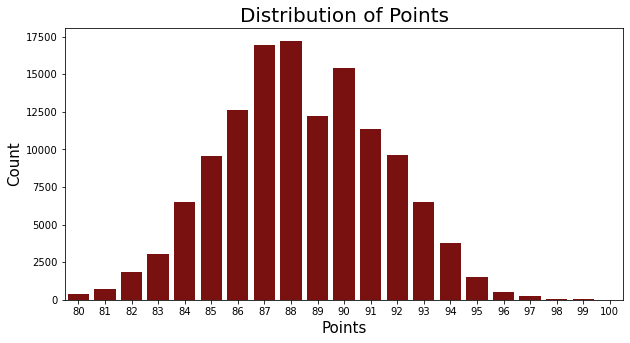

In [8]:
#looking at the distribution of points

plt.figure(figsize=(10,5))

pts = sns.countplot(x='points', data=wine_df, color='darkred') 
pts.set_title("Distribution of Points", fontsize=20) 
pts.set_xlabel("Points", fontsize=15)
pts.set_ylabel("Count", fontsize=15) 
plt.savefig('capstone_final/points_distribution.png')

plt.show() 

In [9]:
#summary stats for points
wine_df.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

We can see that the `points` series follows a fairly normal distribution, with most wines being awarded between 83 and 94 points. The median rating is 88 points. 

In [10]:
#getting avg points by country and number of reviews by country 
country_points = wine_df.groupby('country')['points'].mean().to_frame()
country_points['obs'] = wine_df.groupby('country')['points'].count()

In [11]:
#sorting countries by obs
country_points = country_points.sort_values(by='obs', ascending=False)
country_points.head()

,points,obs
country,,
US,88.563720,54504
France,88.845109,22093
Italy,88.562231,19540
Spain,87.288337,6645
Portugal,88.250220,5691


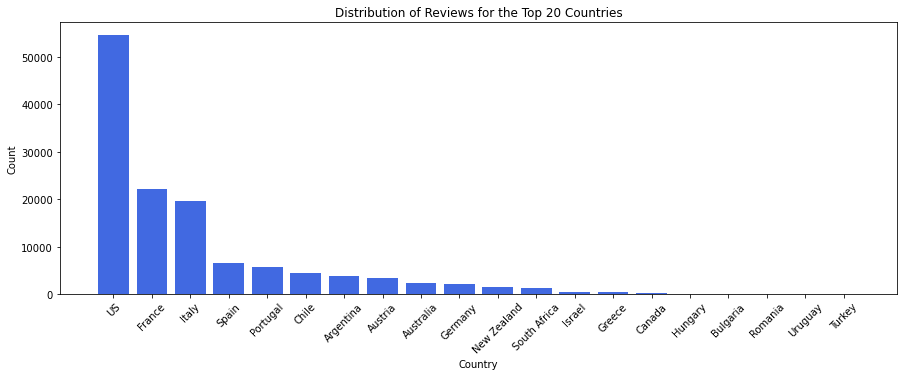

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


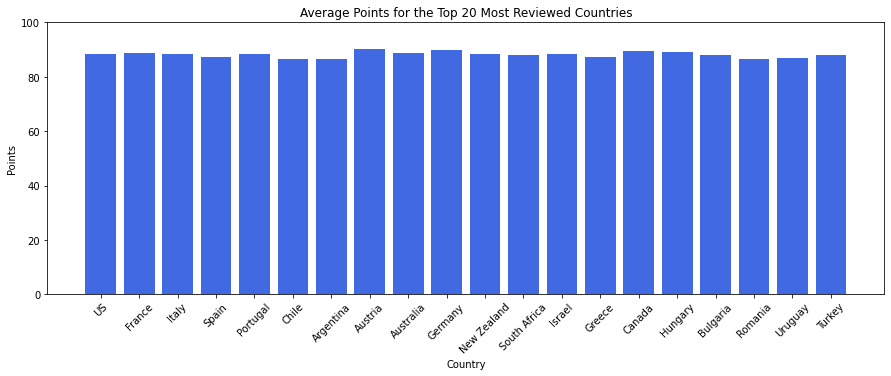

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


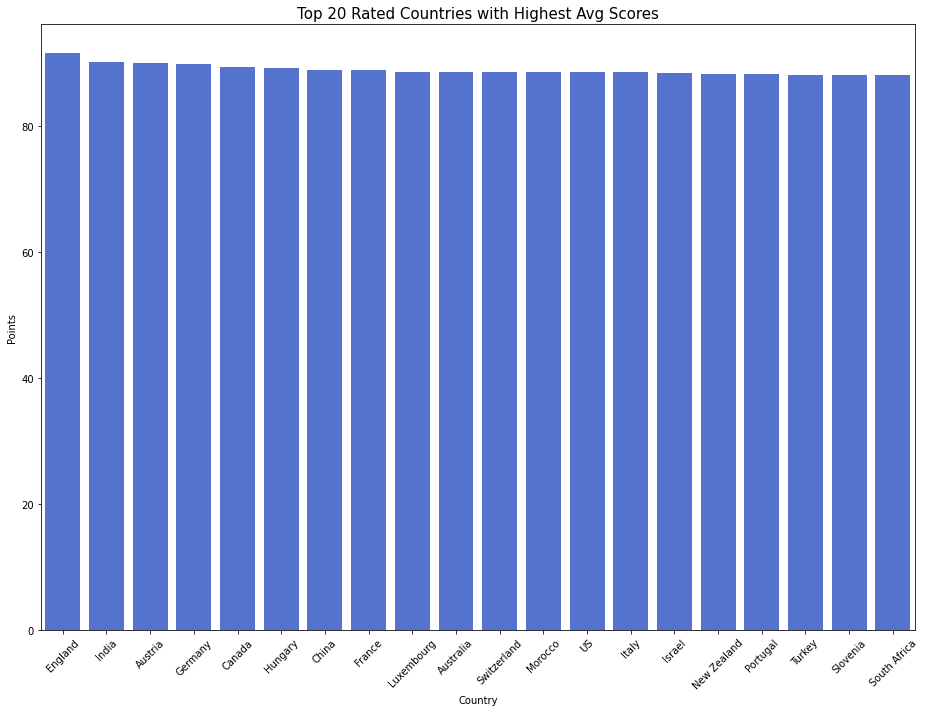

In [12]:
#looking at the most frequently reviewed country in winedf
top_20 = country_points.head(20)


#plot to see top 20 

plt.figure(figsize=(15,5))
plt.bar(top_20.index, top_20['obs'], color='royalblue')
plt.title('Distribution of Reviews for the Top 20 Countries')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()
print("* * * * "*15)


plt.figure(figsize=(15,5))
plt.bar(top_20.index, top_20['points'], color='royalblue')
plt.title('Average Points for the Top 20 Most Reviewed Countries')
plt.ylabel('Points')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylim(0,100)

plt.show()

print("* * * * "*15)

top_20_cpts = country_points.sort_values(by='points', ascending=False).head(20)

#plotting top 20 highest reviewed variety 
plt.figure(figsize=(13,10))
sns.barplot(x= top_20_cpts.index, 
            y = top_20_cpts.points, 
            color='royalblue')
plt.title('Top 20 Rated Countries with Highest Avg Scores', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [13]:
top_20_cpts

,points,obs
country,,
England,91.581081,74
India,90.222222,9
Austria,90.101345,3345
Germany,89.851732,2165
Canada,89.369650,257
Hungary,89.191781,146
China,89.000000,1
France,88.845109,22093
Luxembourg,88.666667,6


While there are some countries that rank in the top 20 with less than 100 reviews (e.g. China, Switzerland, Luxembourg, India), we also see many countries ranking in the top 20 with several hundred or several thousand reviews (U.S., Italy, France, South Africa, etc.). I would conclude that although there are countries with very few reviews that happen to rank very high on average, there are more countries ranking in the top 20 that have many observations in the dataset. The `country` series will be included in my model. 

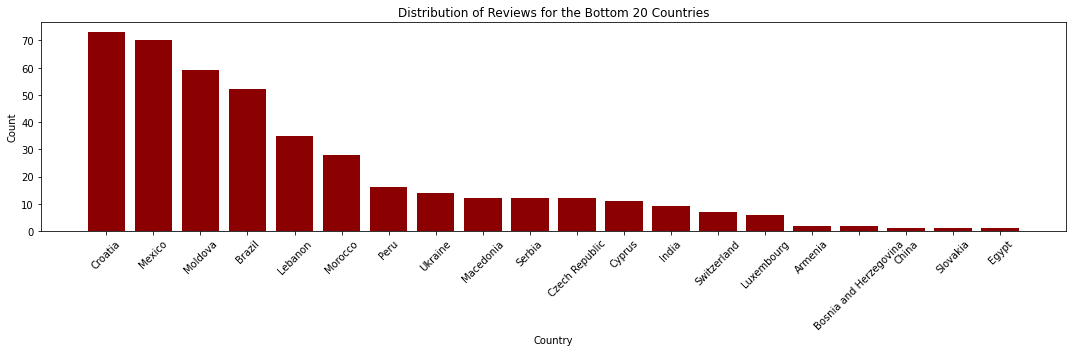

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


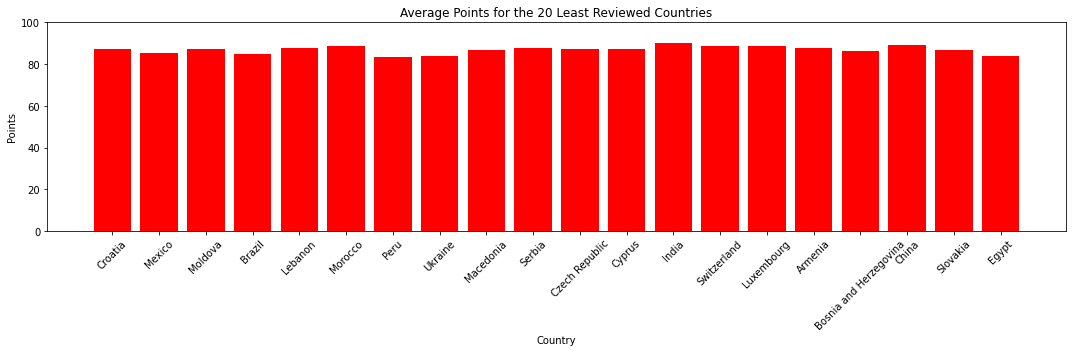

In [14]:
#looking at the least frequently reviewed countries in winedf
low_20 = country_points.tail(20)

#plot to see top 20 
plt.figure(figsize=(15,5))
plt.bar(low_20.index, low_20['obs'], color='darkred')
plt.title('Distribution of Reviews for the Bottom 20 Countries')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("* * * * "*15)

plt.figure(figsize=(15,5))
plt.bar(low_20.index, low_20['points'], color='red')
plt.title('Average Points for the 20 Least Reviewed Countries')
plt.ylabel('Points')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.tight_layout()

plt.show()

In [15]:
print(f'{(country_points.obs[0] / wine_df.shape[0]*100).round(1)}% of all reviews are for U.S. wines.')

41.9% of all reviews are for U.S. wines.


We can clearly see that there is a large difference in the number of wine reviews for U.S. wines vs. all other countries in the dataset. Also worth noting, the 5 least reviewed countries have only 1 or 2 reviews in the dataset. If we were simply performing EDA in this notebook and drawing conclusions and insights based on high level EDA, this could create interpretation problems, since a country's average point score could be misleadingly high. 

For the purpose of this project, I will simply acknowledge that there is an imbalance in the representation of countries in the dataset that could potentially cause my model to perform worse on unseen data yet to be scraped (relative to how it will perform on my testing data). 

I will now explore the relationship between `points` and `price`. 

In [16]:
#checking descriptive stats for price
wine_df.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [17]:
wine_df.price.quantile(0.98)

120.0

Since 98% of the values found in `price` are equal to or below \$120.00, when visualizing the distribution of `price`, I will only be showing the distribution for wines that cost $120.00 or less (if I did not impose a cutoff, the distribution would not be easy to interpret since the most expensive wine is more than 27 times more expensive than 98% of the wines reviewed in my data). 

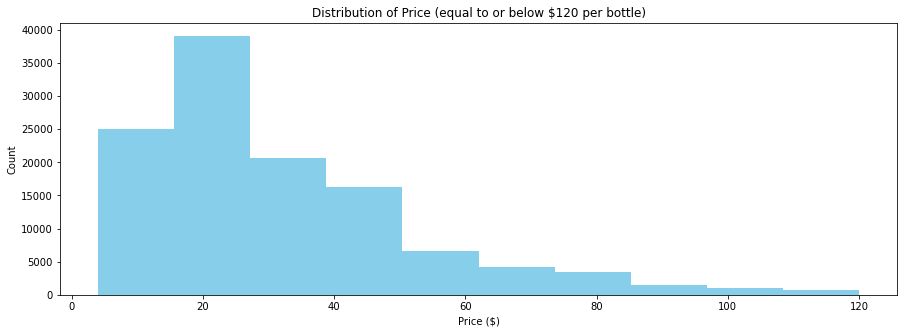

In [18]:
#first looking at the distribution of price when price <=120
plt.figure(figsize=(15,5))
plt.hist(wine_df.price[wine_df['price']<=120], color='skyblue')
plt.title('Distribution of Price (equal to or below $120 per bottle)')
plt.ylabel('Count')
plt.xlabel('Price ($)')
plt.show()

We can definitely see that the `price` series is heavily right skewed (and it would be even more right-skewed had I included observations in the dataset where the `price` was above $120.00). I will later consider log-transforming this feature to minimize how skewed it is. 

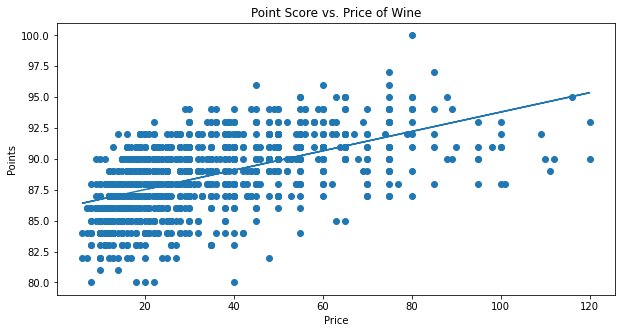

The slope of the trendline is 0.078 (note: random sample was taken).


In [19]:
#downsampling for the purpose of visualization 
sample_wine = wine_df[wine_df['price'] <=120].sample(frac=0.01, random_state=8)

#slope, z
z = np.polyfit(sample_wine['price'], sample_wine['points'], 1)
p = np.poly1d(z)


#plotting sample of price and points
plt.figure(figsize=(10,5))
plt.scatter(sample_wine['price'], sample_wine['points'])
plt.plot(sample_wine['price'], p(sample_wine['price']))
plt.title('Point Score vs. Price of Wine')
plt.xlabel('Price')
plt.ylabel('Points')

plt.show()

print(f'The slope of the trendline is {(z[0]).round(3)} (note: random sample was taken).')

As we can see in the above figure, there is a weak positive correlation between `points` and `price` (which is great for those of us that want a high quality wine at a reasonable price!). What this tells us is that while more expensive wines are generally awarded more points when reviewed, there are still several inexpensive wines that outperform wines at higher price points, which means that the price of a wine alone does not determine its success in terms of points.

Moving onto the `taster_name` series, I will quickly explore the distribution of observations across our different wine experts, and I will briefly look at the distribution of points for each wine expert. 

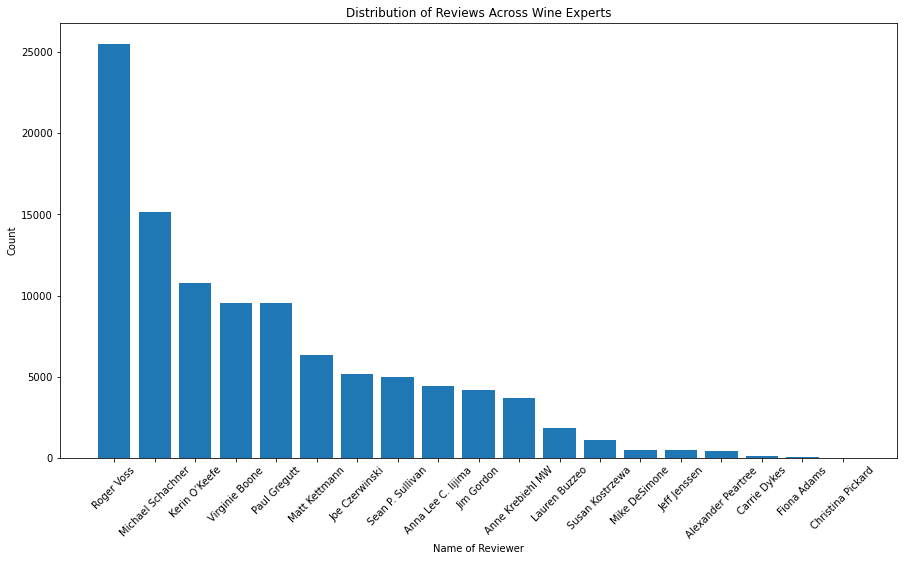

In [20]:
#checking which reviewer is the top reviewer. 

plt.figure(figsize=(15,8))
plt.bar(wine_df['taster_name'].value_counts().index, wine_df['taster_name'].value_counts().values)
plt.xlabel('Name of Reviewer')
plt.ylabel('Count')
plt.title('Distribution of Reviews Across Wine Experts')
plt.xticks(rotation=45)
plt.show()

In [21]:
#getting descriptive stats for points for each wine expert

taster_points = wine_df.groupby('taster_name')['points'].describe()
taster_points

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,415.0,85.855422,1.934511,80.0,85.0,86.0,87.0,91.0
Anna Lee C. Iijima,4415.0,88.415629,2.561359,80.0,87.0,88.0,90.0,98.0
Anne Krebiehl MW,3685.0,90.562551,2.373100,80.0,89.0,90.0,92.0,97.0
Carrie Dykes,139.0,86.395683,1.998618,81.0,85.0,87.0,88.0,92.0
Christina Pickard,6.0,87.833333,3.600926,82.0,87.0,88.0,89.0,93.0
Fiona Adams,27.0,86.888889,1.739437,82.0,86.0,87.0,88.0,91.0
Jeff Jenssen,491.0,88.319756,2.022727,82.0,87.0,89.0,89.0,97.0
Jim Gordon,4177.0,88.626287,2.698341,80.0,87.0,89.0,91.0,97.0
Joe Czerwinski,5147.0,88.536235,2.858701,80.0,87.0,89.0,91.0,100.0


We can see that the average number of points awarded varies by wine expert, as does the median and the maximum number of points awarded. Let's plot this information out as it may be easier to interpret. 

In [22]:
#getting the number of obs each taster has rated wines 80-100
taster_points_ct = wine_df.groupby(['taster_name', 'points'])['points'].count().to_frame()
taster_points_ct.rename(columns={'points' : 'obs'}, inplace=True)

#resetting index so multi index becomes cols 
taster_points_ct = taster_points_ct.reset_index()
taster_points_ct

,taster_name,points,obs
0,Alexander Peartree,80,3
1,Alexander Peartree,81,4
2,Alexander Peartree,82,11
3,Alexander Peartree,83,26
4,Alexander Peartree,84,53
...,...,...,...
300,Virginie Boone,95,143
301,Virginie Boone,96,34
302,Virginie Boone,97,15
303,Virginie Boone,98,12


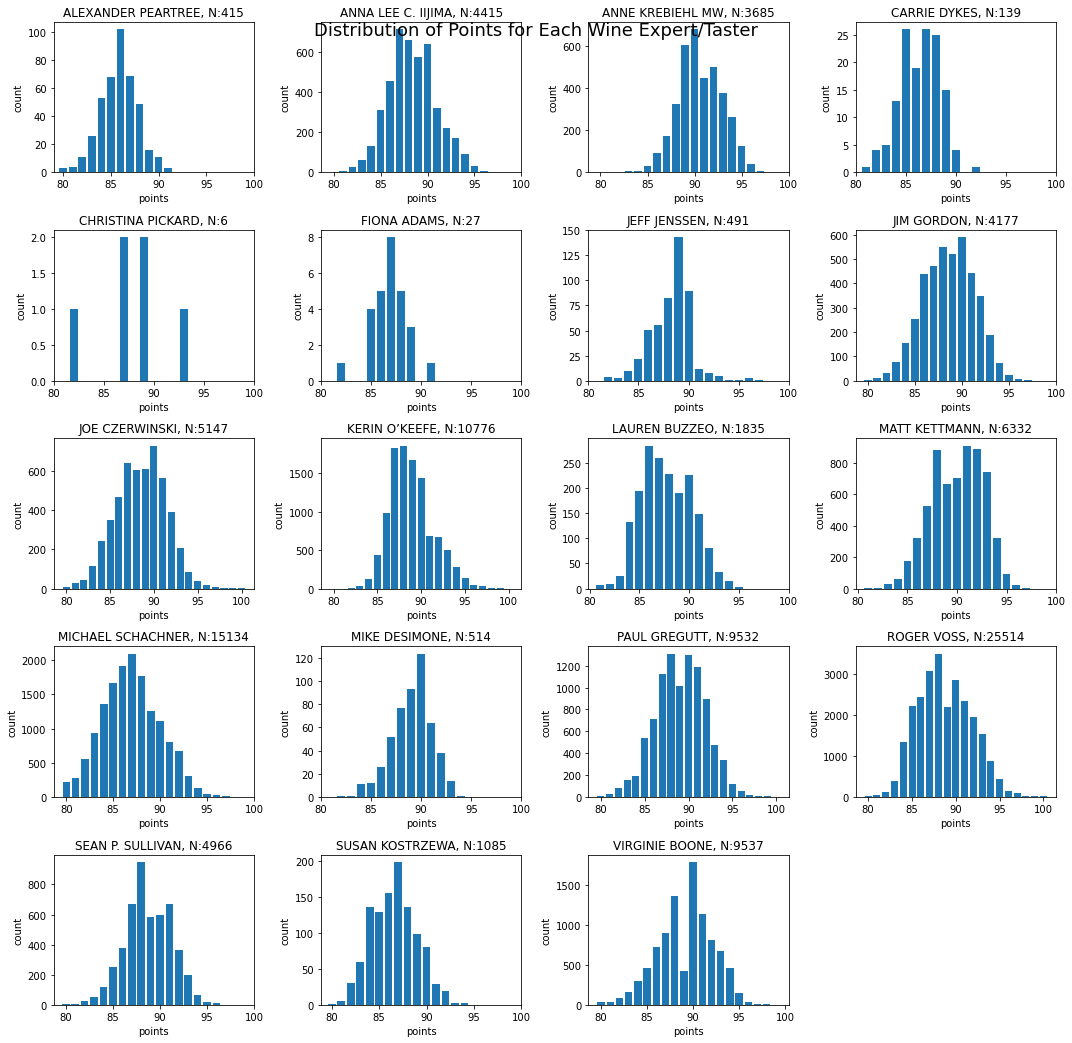

In [23]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of Points for Each Wine Expert/Taster", fontsize=18, y=0.95)

# loop through taster names
for n, ticker in enumerate(taster_points_ct.taster_name.unique()):
    # add a new subplot iteratively
    ax = plt.subplot(5, 4, n + 1)
    
    #setting my x and y for plots
    x=taster_points_ct.loc[taster_points_ct.taster_name == ticker].points
    y=taster_points_ct.loc[taster_points_ct.taster_name == ticker].obs

    # plot 
    plt.bar(x,y)
    
    #setting x ticks to be the same for each 
    ax.set_xticks(np.arange(80, 105, 5))

    # chart formatting
    ax.set_title(f'{ticker.upper()}, N:{taster_points_ct.loc[taster_points_ct.taster_name == ticker].obs.sum()}')
    #ax.get_legend().remove()
    ax.set_xlabel("points")
    ax.set_ylabel('count')
plt.tight_layout()
    

It should be acknowledged that some experts appear far less frequently in the dataset than others (e.g. Christina Pickard only has 6 reviews in the dataset, and Roger Voss appears over 25,000 times). With that being said, we can see that some wine experts are more generous in terms of their ratings than others. This will likely assist my model in predicting wine ratings.

The drawback with including this feature in my model is that at some point, Wine Enthusiast may hire new experts publishing reviews and points for their magazine, and similarly the wine experts included in this dataset may no longer work with Wine Enthusiast in the future. In other words, the taster's name, at some point, will no longer assist in predicting points. For this project, I will be including this feature, but under the (less than ideal) assumption that the above tasters are the current reviewers for Wine Enthusiast and they will remain to be the official reviewers of Wine Enthusiast for the foreseeable future. 

I will likely fill any nulls found in the `taster_name` column with the wine expert who appears most frequently in each dataset (train, valid, test sets). For those same rows, I will use the most frequent taster's twitter handle found elsewhere in the dataset to fill the nulls in the `taster_twitter_handle` series. After some thought I have decided that in order to capture some of the information found in the `taster_twitter_handle` column, I can simply convert this series to a binary variable, representing whether a reviewer has twitter or does not have twitter (rows that have remaining nulls left in the `taster_twitter_handle` column with non-null `taster_name` values will be assigned a value of 0 representing that the reviewer does not have a twitter account, or did not have a twitter account at the time the taster reviewed the wine). 

Once again, if I determine that these variables should not be included in my model later on in my analysis, I can simply drop them from my sets and build my model from there. 

I will now quickly review the distribution of `variety` and its relationship with my target, `points`. 

In [24]:
#checking how many varieties
wine_df.variety.nunique()

707

In [25]:
#getting avg points by variety and number of reviews by variety 
variety_points = wine_df.groupby('variety')['points'].mean().to_frame()
variety_points['obs'] = wine_df.groupby('variety')['points'].count()
#sorting countries by obs
variety_points = variety_points.sort_values(by='obs', ascending=False)
variety_points

,points,obs
variety,,
Pinot Noir,89.411468,13272
Chardonnay,88.340083,11753
Cabernet Sauvignon,88.607580,9472
Red Blend,88.380282,8946
Bordeaux-style Red Blend,89.106435,6915
...,...,...
Tempranillo-Malbec,91.000000,1
Malbec-Carménère,91.000000,1
Malagouzia-Chardonnay,86.000000,1


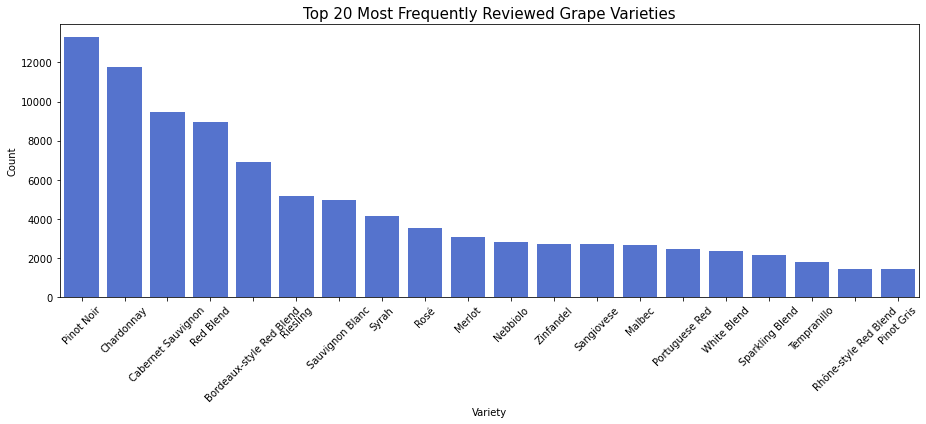

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


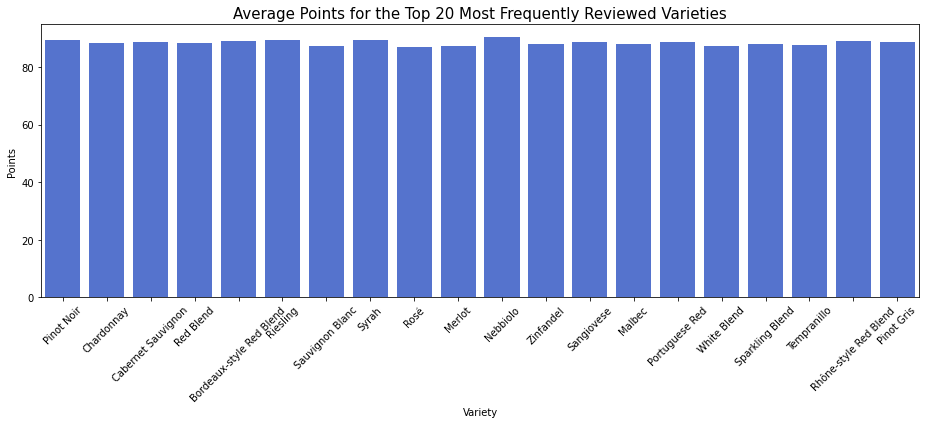

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


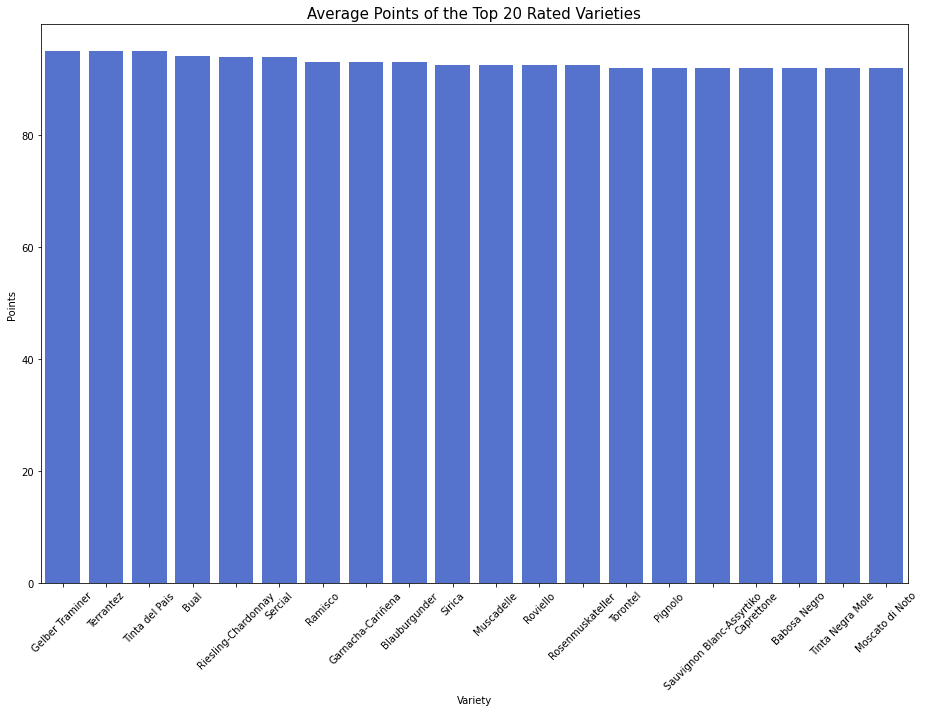

In [26]:
top_20_var = variety_points.head(20)

#plotting frequency of variety 
plt.figure(figsize=(13,6))
sns.barplot(x= top_20_var.index, y = top_20_var.obs, color='royalblue')
plt.title('Top 20 Most Frequently Reviewed Grape Varieties', fontsize=15)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("* * * * "*15)

#plotting average points for top20 varieties
plt.figure(figsize=(13,6))
sns.barplot(x= top_20_var.index, y = top_20_var.points, color='royalblue')
plt.title('Average Points for the Top 20 Most Frequently Reviewed Varieties', fontsize=15)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("* * * * "*15)

top_20_pts = variety_points.sort_values(by='points', ascending=False).head(20)

#plotting top 20 highest reviewed variety 
plt.figure(figsize=(13,10))
sns.barplot(x= top_20_pts.index, 
            y = top_20_pts.points, 
            color='royalblue')
plt.title('Average Points of the Top 20 Rated Varieties', fontsize=15)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [27]:
#checking top 20
top_20_pts

,points,obs
variety,,
Gelber Traminer,95.000000,1
Terrantez,95.000000,1
Tinta del Pais,95.000000,2
Bual,94.142857,7
Riesling-Chardonnay,94.000000,1
Sercial,94.000000,1
Ramisco,93.000000,1
Garnacha-Cariñena,93.000000,1
Blauburgunder,93.000000,1


Here we can see that the top ranking varieties (in terms of average points) have 10 or less occurrences in the dataset. I will quickly look at what this list would look like if I ignored varieties with less than 100 occurrences. 

In [28]:
#fitlering variety_points for top ranking avg points with at least 100 obs
variety_points[variety_points['obs'] >99].sort_values(by='points', ascending=False).head(20)

,points,obs
variety,,
Sangiovese Grosso,90.529960,751
Nebbiolo,90.251070,2804
Blaufränkisch,90.021552,232
Grüner Veltliner,89.980669,1345
Tinto Fino,89.880000,100
Sagrantino,89.826923,104
Sherry,89.820000,100
Port,89.733533,668
Nerello Mascalese,89.683761,117


The fact that the top 20 ranked varieties have fewer reviews in the dataset should not come as a surprise. I will be including the `variety` series as a feature in my model, as I am confident that it will help my model with predicting points (after all, different varietals return different levels of sugar and flavour). I will likely need to do some feature selection anyway, and if it's appropriate, I may decide to use the VarianceThreshold tool, which would drop features that had an extremely low variance (negligibly different from 0). 

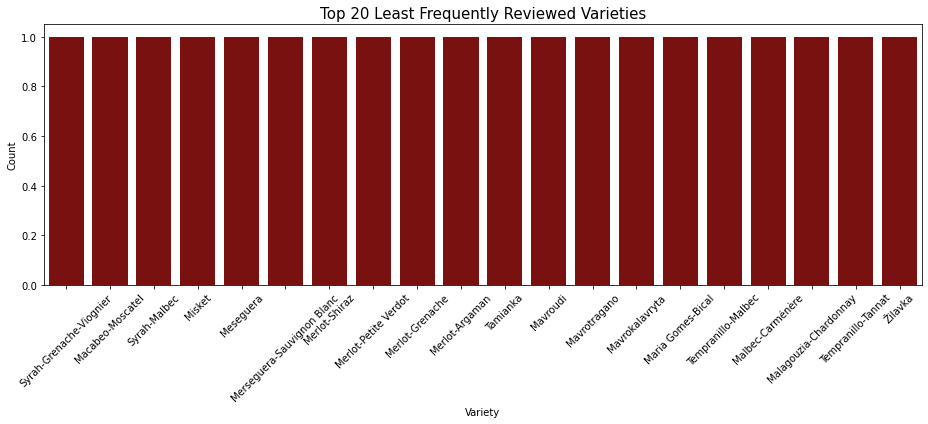

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


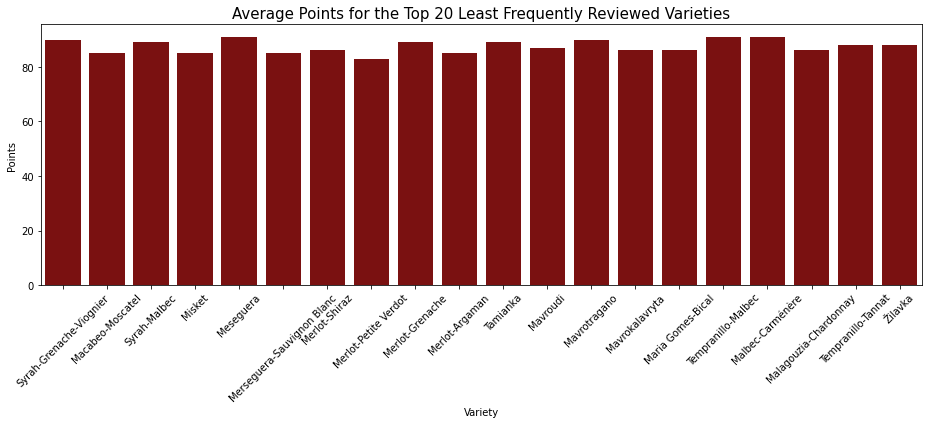

In [29]:
low_20_var = variety_points.tail(20)

#plotting frequency of variety 
plt.figure(figsize=(13,6))
sns.barplot(x= low_20_var.index, y = low_20_var.obs, color='darkred')
plt.title('Top 20 Least Frequently Reviewed Varieties', fontsize=15)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("* * * * "*15)

#plotting average points for bottom20 varieties
plt.figure(figsize=(13,6))
sns.barplot(x= low_20_var.index, y = low_20_var.points, color='darkred')
plt.title('Average Points for the Top 20 Least Frequently Reviewed Varieties', fontsize=15)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Here we can see that the 20 least frequently reviewed varieties in the dataset all only have a single appearance. While we can see that the 20 least reviewed varieties appear to have marginally lower scores on average (relative to the top 20 most frequently reviewed varieties), their average points are very similar to those of the most frequently reviewed varieties. Let's also recall that the top 20 highest ranked varieties in terms of average points had 10 or less occurrences in the dataset. It appears that `variety` and `points` have a similar relationship to what we saw when exploring the `country` series. 

I very briefly wanted to take a look at the relationship between word count and points to see if there was a possible relationship I could capture during my feature engineering step. 

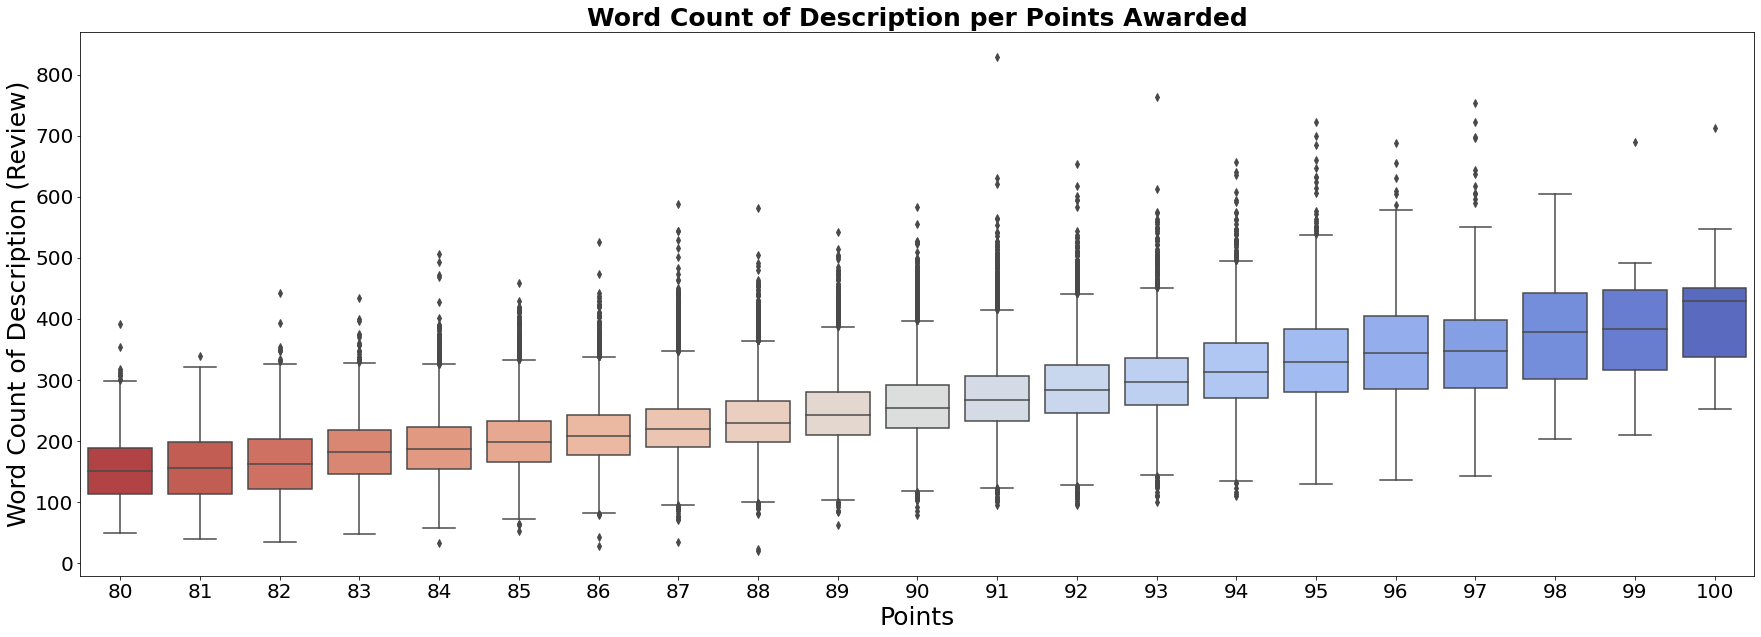

In [30]:
#boxplot for word count across points
word_ct = wine_df.assign(desc_word_ct = wine_df['description'].apply(len))
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='desc_word_ct', data=word_ct, palette = 'coolwarm_r')
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Word Count of Description per Points Awarded', fontweight="bold", size=25) 
ax.set_ylabel('Word Count of Description (Review)', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) 

plt.show()

In [31]:
#creating df of length of description and points
word_count = wine_df['description'].apply(len).to_frame()
word_count['points'] = wine_df['points']
word_count

,description,points
0,172,87
1,227,87
2,186,87
3,199,87
4,249,87
...,...,...
129966,227,90
129967,233,90
129968,225,90
129969,216,90


In [32]:
#average word count by points 
wc_pts_df = word_count.groupby('points').mean()
wc_pts_df

,description
points,
80,155.201511
81,158.158960
82,165.656318
83,184.115702
84,191.532253
85,202.166527
86,212.450238
87,223.738735
88,234.161039


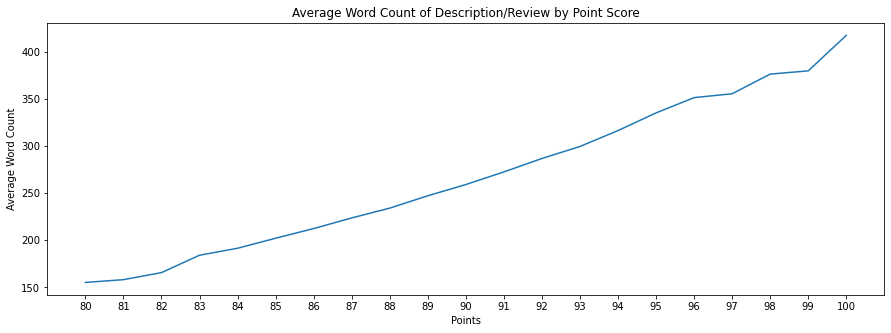

In [33]:

#creating line plot of avg word count across points
plt.figure(figsize = (15,5))
plt.plot(wc_pts_df.index, wc_pts_df.description)
plt.xticks(range(80,101))
plt.title('Average Word Count of Description/Review by Point Score')
plt.ylabel('Average Word Count')
plt.xlabel('Points')
plt.savefig('capstone_final/wc_avg.png')
plt.show()

It appears there is a relationship between word count and points. It seems that wine experts generally tend to write longer reviews for wines they enjoy in comparison to wines they do not enjoy as much. Let's quickly take a look at the words commonly used in reviews with the highest ratings vs. reviews with lowest ratings.

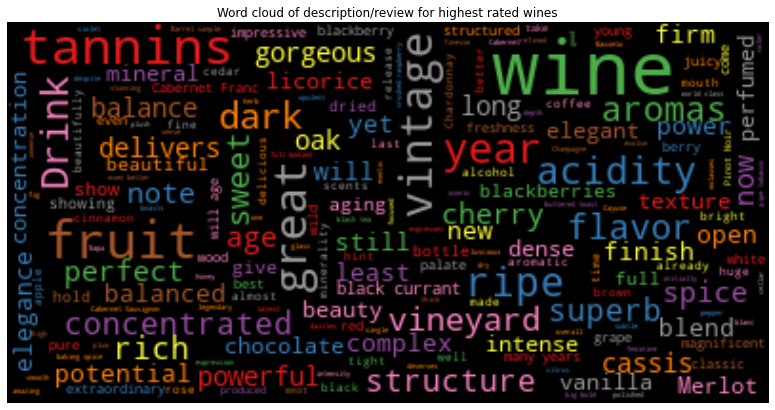

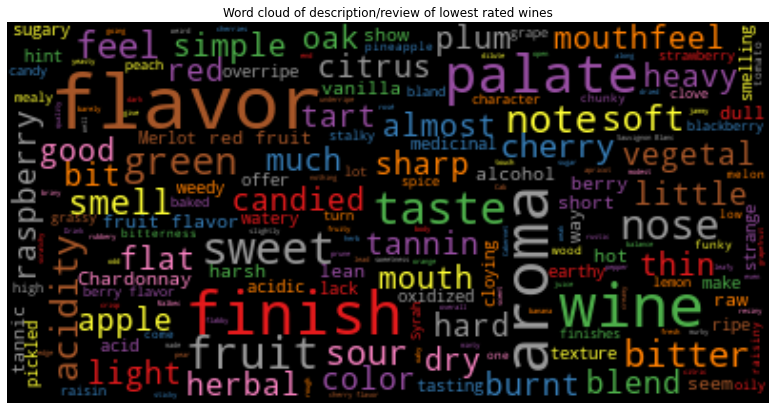

In [34]:
from wordcloud import WordCloud, STOPWORDS


#using word cloud to visualize words being used in high ranking reviews 
plt.figure(figsize= (15,7))
plt.title('Word cloud of description/review for highest rated wines')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine_df[wine_df['points']>=99]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.savefig('capstone_final/highest_rating_words.png')
plt.show()

#sns.set_context("talk")
plt.figure(figsize= (15,7))
plt.title('Word cloud of description/review of lowest rated wines')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine_df[wine_df['points'] <= 81]['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.savefig('capstone_final/low_rank_words.png')
plt.show()



While we can see that there is some overlap with words being used to describe high ranking and low ranking wines, there is certainly a difference in buzz words. Some similar words between groups: wine, fruit, sweet - although these appear in reviews for high and low rated wines, the word 'wine' itself doesn't really hold much value, and the word 'sweet' appears to occur less frequently in the higher rated wines (the size of the word is smaller in the wordcloud representing highly rated reviews). 

In [35]:
#checking data type and col counts again
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   points                 129971 non-null  int64  
 3   price                  120975 non-null  float64
 4   province               129908 non-null  object 
 5   taster_name            103727 non-null  object 
 6   taster_twitter_handle  98758 non-null   object 
 7   title                  129971 non-null  object 
 8   variety                129970 non-null  object 
 9   winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.9+ MB


<a id="notes"></a>
## 1.3 - Important Notes:

* Each row represents a single review for a given wine 
* We have nearly 130,000 rows with 13 columns
* The columns describe the characteristics of the wine being reviewed (and two columns indicate the reviewer's name and twitter handle)
* There appears to be 9,983 duplicate rows in my dataset that must be reviewed further and dropped if deemed true duplicates
* There are NaN values present in several columns that will need to be dealt with
* Most of the variables in the dataset have an object data type; these columns will need to be converted to numeric values
* `title` contains the name of and the vintage of the wine being reviewed (the vintage, i.e. year, can easily be pulled and included as a feature in my model)
* I will create a feature from the length of the `description` for each review
* The `designation`, `region_1`, `region_2`, and the `winery` series either contain many NaNs, repeat information being stored in other columns, or have too many unique values making them expensive to encode and include in my model (or some combination of these reasons), therefore these columns will be dropped from my model (an example of the repetition in these columns can be seen in the fifth row (index 4) of the dataframe above displayed earlier in the notebook)
* Although `taster_name` and `taster_twitter_handle` contain a high number of nulls, before I decide to drop these series, I would first like to explore my options for filling these nulls and review whether these columns may add value to my model 
* My target is the `points` series and I will be converting this into a classification problem (with class 1 representing positive sentiment or positive reviews/points, and class 0 representing lower ranking scores, i.e. negative sentiment) 

---

<a id="pt2"></a>
# Part 2: Data Cleaning & Preprocessing & Wrangling

Before diving into my analysis and before I begin building any models, I will need to clean and prepare my data. This step is an integral part in any analysis and in any model building process. I will start by taking a closer look at the rows being flagged as duplicates (and dropping them if they are true duplicates). I will then drop redundant columns (refer to Important Notes above). At that point I will fill null values, perform some feature engineering (more specifically, I will be creating feature(s) that I expect will add value to my model), and lastly, I will end this section with encoding my categorical columns and vectorizing my text data. 

In order to avoid data leakage, I will need to split my data into three sets (train set, validation set, and test set) before I clean or manipulate my data (note: I will need to drop true duplicates before the split, to avoid having the same observation appear in both my training and testing data, as this would falsely boost my model's performance). The validation set will assist me with optimizing my hyperparameters as it will act as a proxy for my test set. 

In [36]:
#making a copy of my df 
wine_copy = wine_df.copy()

<a id="dup"></a>
## 2.1 - Dealing with duplicates 

In [37]:
#creating df of duplicate rows
duplicate_rows = wine_copy[wine_copy.duplicated()]
duplicate_rows.head()

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,85,13.0,Sicily & Sardinia,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,Chile,Lightly herbal strawberry and raspberry aromas...,85,13.0,Maipo Valley,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2412,Italy,The Monica grape often shows a rustic or raw q...,85,14.0,Sicily & Sardinia,NaN,NaN,Cantine di Dolianova 2010 Dolia (Monica di Sa...,Monica,Cantine di Dolianova
2413,France,"Fruity and lightly herbaceous, this has fine t...",85,15.0,Bordeaux,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours


In [38]:
#getting the full description of the first duplicate row in duplicate df
duplicate_rows.description[2408]

'This is weighty, creamy and medium to full in body. It has plenty of lime and pear flavors, plus slight brown sugar and vanilla notes.'

In [39]:
#checking if the description of index 2408 is found in another row in wine_copy
wine_copy.loc[wine_copy.description == duplicate_rows.description[2408]]

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
56,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain


In [40]:
#getting the full description of the second row in duplicate df
duplicate_rows.description[2409]

"There's a touch of toasted almond at the start, but then this Grillo revs up in the glass to deliver notes of citrus, stone fruit, crushed stone and lemon tart. The mouthfeel is crisp and simple."

In [41]:
#checking if the description of index 2409 is found in another row in wine_copy
wine_copy.loc[wine_copy.description == duplicate_rows.description[2409]]

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
57,Italy,There's a touch of toasted almond at the start...,85,13.0,Sicily & Sardinia,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2409,Italy,There's a touch of toasted almond at the start...,85,13.0,Sicily & Sardinia,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita


Based on the above output, we can confirm that the rows being flagged as duplicates are in fact true duplicates. I will now drop them from my wine_copy dataframe (keeping the first entries in my dataset), and I will then proceed to split my data and continue the cleaning process. 

In [42]:
#dropping duplicates from wine_copy
wine_copy = wine_copy.drop_duplicates()

#check 
wine_copy.duplicated().sum()

0

In [43]:
#checking that the first entry was kept in df 
wine_copy.loc[wine_copy.index == 56 ]

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
56,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain


In [44]:
#checking shape after drop
wine_copy.shape

(119988, 10)

After dropping duplicates, I am left with just under 120,000 rows, and 13 columns. 

<a id="split"></a>
## 2.2 - Splitting data into train, validation, and test sets

In [45]:
#setting x and y equal to features and target variables
X = wine_copy.drop('points', axis=1)
y = wine_copy['points']
print(f'There are {X.shape[0]} rows in X and {y.shape[0]} rows in y.')

There are 119988 rows in X and 119988 rows in y.


In [46]:
#looking at first 5 rows of X
X.head()

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",NaN,Sicily & Sardinia,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",14.0,Oregon,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,Michigan,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",65.0,Oregon,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [47]:
#looking at first 5 rows of y
y.head()

0    87
1    87
2    87
3    87
4    87
Name: points, dtype: int64

In [48]:
#splitting data into remainder and test 
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
#splitting remainder into validation and train sets
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.25, random_state=100, stratify=y_remainder)

In [50]:
#checking the rows and cols in each set 
print(f'X_train has {X_train.shape[0]} rows, and {X_train.shape[1]} columns.')
print(f'y_train has {y_train.shape[0]} rows.')
print(f'X_valid has {X_valid.shape[0]} rows, and {X_valid.shape[1]} columns.')
print(f'y_valid has {y_valid.shape[0]} rows.')
print(f'X_test has {X_test.shape[0]} rows, and {X_test.shape[1]} columns.')
print(f'y_test has {y_test.shape[0]} rows.')

X_train has 71992 rows, and 9 columns.
y_train has 71992 rows.
X_valid has 23998 rows, and 9 columns.
y_valid has 23998 rows.
X_test has 23998 rows, and 9 columns.
y_test has 23998 rows.


In [51]:
#checking that y was stratified 
points_dist = pd.DataFrame(index=y_train.value_counts().index)
points_dist['y_train'] = (y_train.value_counts()/y_train.shape[0])*100
points_dist['y_valid'] = (y_valid.value_counts()/y_valid.shape[0])*100
points_dist['y_test'] = (y_test.value_counts()/y_test.shape[0])*100

display(points_dist.sort_index())

,y_train,y_valid,y_test
80,0.331981,0.329194,0.329194
81,0.573675,0.575048,0.575048
82,1.511279,1.512626,1.512626
83,2.468330,2.471039,2.471039
84,5.188076,5.187932,5.187932
85,7.556395,7.558963,7.554796
86,9.606623,9.604967,9.604967
87,12.733359,12.734395,12.734395
88,12.744472,12.742729,12.742729
89,9.289921,9.292441,9.288274


Now that I have split my data into training, validation, and test sets, and have confirmed that my target, `points`, was stratified, I will deal with null values X_train, X_valid, and X_test sets. 

<a id="null"></a>
## 2.3 - Filling Null Values 

As mentioned in the Important Notes section earlier on in this notebook, I will later consider whether to drop the remaining columns that have a large proportion of null values, but I will keep them for now (`taster_name`, `taster_twitter_handle`). I will now begin filling nulls in my data. 

### Filling null values in my training set

In [52]:
#recall we have many null values to handle
X_train.isna().mean()*100

country                   0.036115
description               0.000000
price                     6.902156
province                  0.036115
taster_name              20.787032
taster_twitter_handle    24.590232
title                     0.000000
variety                   0.000000
winery                    0.000000
dtype: float64

My training data has a relatively low number of missing values in the following columns: `country`, `price`, `province`, and `variety`. My training dataset has a relatively high number of missing values in the following columns: `taster_name` and `taster_twitter_handle`. I will start with the columns with fewer NaN values, and then I will explore my options with the features missing many values. I will then repeat this process for my validation and test sets.  

### `country` & `province` 

In [53]:
#inspecting where there are missing values for country in X_train
missing_country_train = X_train.loc[X_train.country.isna()]
print(f'There are {missing_country_train.shape[0]} rows with missing country values in X_train.')
missing_country_train

There are 26 rows with missing country values in X_train.


,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
26486,NaN,Aromas of green apple and white flowers prepar...,14.0,NaN,Mike DeSimone,@worldwineguys,Teliani Valley 2015 Tsolikouri,Tsolikouri,Teliani Valley
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",40.0,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
45402,NaN,Basic cherry aromas turn more earthy and soupy...,12.0,NaN,Michael Schachner,@wineschach,Chilcas 2015 Reserva Estate Bottled Pinot Noir,Pinot Noir,Chilcas
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",25.0,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
57612,NaN,Winemaker: Gordon Newton Johnson. This is such...,NaN,NaN,Lauren Buzzeo,@laurbuzz,Newton Johnson 2016 Cape Winemakers Guild Wind...,Pinot Noir,Newton Johnson
113520,NaN,Aromas of crushed stone and graphite lead toas...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tannat,Tannat,El Capricho
44851,NaN,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
49425,NaN,"This blend is comprised of 55% Merlot, 21% Cab...",28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2011 Getika Made With Organic Grapes Red,Red Blend,Orbelus
36112,NaN,An interesting blend of indigenous Bulgarian a...,25.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2012 Hrumki Melnik 55 Mourvèdre Marsel...,Red Blend,Orbelus
105715,NaN,"Aromas of blackberry, strawberry and chocolate...",50.0,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Peak Red,Rhône-style Red Blend,Psagot


We can visually see that we are missing `province` values for the same observations that we are missing `country` values, and therefore I will deal with the nulls in these two columns at the same time. I have a couple of ways to fill these nulls in mind. The first (and most favourable) method will be to use the `winery` value for the row with missing country/province information, and looking for that winery elsewhere in the dataset, where `country` and `province` are non-null. If I still have nulls after my first method, I will explore my other options.

In [54]:
#checking for which wineries we are missing countries as we can find these details online
print(missing_country_train.winery.unique())
print(missing_country_train.winery.nunique())

['Teliani Valley' 'Familia Deicas' 'Chilcas' 'St. Donat' 'Newton Johnson'
 'El Capricho' 'Stone Castle' 'Orbelus' 'Psagot' 'Ross-idi' 'Neumeister'
 'Lismore' 'Santa Ema' 'Les Frères Dutruy' 'Tsililis']
15


Since there are only 15 wineries that had country names missing in my training data, I can easily fill the missing country names by searching where these wineries are located on Google (if this information is not found elsewhere in my training dataset). That is, I will resort to Google only if the information can't be found elsewhere in my training data. 

In [55]:
#creating data frame with only winery and country cols with complete values from x_train (non-null only)
winery_country_train = X_train[['winery', 'country', 'province']].dropna()
winery_country_train.head()

,winery,country,province
118191,Fess Parker,US,California
121795,Barberani,Italy,Central Italy
51208,Altocedro,Argentina,Other
32362,Sleight of Hand,US,Washington
56346,Zisola,Italy,Sicily & Sardinia


In [56]:
#grouping by wineries so we have one row for each winery and have its country in the same row  
winery_country_train = winery_country_train.groupby('winery').first()
winery_country_train = winery_country_train.reset_index()
winery_country_train

,winery,country,province
0,1+1=3,Spain,Catalonia
1,10 Knots,US,California
2,100 Percent Wine,US,California
3,1000 Stories,US,California
4,10Span,US,California
...,...,...,...
14340,Órale,US,California
14341,Öko,Argentina,Mendoza Province
14342,Ökonomierat Rebholz,Germany,Pfalz
14343,àMaurice,US,Washington


In [57]:
#looping through to fill null countries with the same winery being found elsewhere in the train data with filled country 
for i in missing_country_train.index:
    for j in winery_country_train.index:
        if missing_country_train.winery[i] == winery_country_train.winery[j]:
            missing_country_train.country[i] = winery_country_train.country[j]

In [58]:
#looping through to fill null provinces with the same winery being found elsewhere in the train data with filled province 
for i in missing_country_train.index:
    for j in winery_country_train.index:
        if missing_country_train.winery[i] == winery_country_train.winery[j]:
            missing_country_train.province[i] = winery_country_train.province[j]

In [59]:
#look
missing_country_train

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
26486,Georgia,Aromas of green apple and white flowers prepar...,14.0,Georgia,Mike DeSimone,@worldwineguys,Teliani Valley 2015 Tsolikouri,Tsolikouri,Teliani Valley
16000,Uruguay,"Jumpy, jammy aromas of foxy black fruits are s...",40.0,Uruguay,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
45402,Chile,Basic cherry aromas turn more earthy and soupy...,12.0,Central Valley,Michael Schachner,@wineschach,Chilcas 2015 Reserva Estate Bottled Pinot Noir,Pinot Noir,Chilcas
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",25.0,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
57612,NaN,Winemaker: Gordon Newton Johnson. This is such...,NaN,NaN,Lauren Buzzeo,@laurbuzz,Newton Johnson 2016 Cape Winemakers Guild Wind...,Pinot Noir,Newton Johnson
113520,NaN,Aromas of crushed stone and graphite lead toas...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tannat,Tannat,El Capricho
44851,NaN,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
49425,NaN,"This blend is comprised of 55% Merlot, 21% Cab...",28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2011 Getika Made With Organic Grapes Red,Red Blend,Orbelus
36112,NaN,An interesting blend of indigenous Bulgarian a...,25.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2012 Hrumki Melnik 55 Mourvèdre Marsel...,Red Blend,Orbelus
105715,Israel,"Aromas of blackberry, strawberry and chocolate...",50.0,Judean Hills,Mike DeSimone,@worldwineguys,Psagot 2014 Peak Red,Rhône-style Red Blend,Psagot


In [60]:
#check for unique countries in missing country df
missing_country_train.country.unique()

array(['Georgia', 'Uruguay', 'Chile', nan, 'Israel', 'Austria'],
      dtype=object)

In [61]:
#check for unique provinces in missing country df
missing_country_train.province.unique()

array(['Georgia', 'Uruguay', 'Central Valley', nan, 'Judean Hills',
       'Südoststeiermark', 'Maipo Valley'], dtype=object)

While we are still dealing with some NaN values in the `country` and `province` series, we are dealing with fewer. I will now filter for the remaining wineries we need to fill the countries for, and use Google to find which country they are located in. For the provincial information, I will be using the most common provinces for each country-variety combo (more on this below).  

In [62]:
#pulling rows with country still missing and getting winery names  
still_missing_countries = list(missing_country_train.loc[missing_country_train.country.isna()].winery.unique())
still_missing_countries

['St. Donat',
 'Newton Johnson',
 'El Capricho',
 'Stone Castle',
 'Orbelus',
 'Ross-idi',
 'Lismore',
 'Les Frères Dutruy',
 'Tsililis']

According to each winery's local listing on Google, the wineries are located in:
* 'St. Donat': 'Hungary'
* 'Newton Johnson': 'South Africa'
* 'El Capricho': 'Uruguay'
* 'Stone Castle': 'Kosovo'
* 'Orbelus': 'Bulgaria'
* 'Ross-idi': 'Bulgaria'
* 'Lismore': 'South Africa'
* 'Les Frères Dutruy': 'Switzerland'
* 'Tsililis': 'Greece'

In [63]:
#filling nulls using Google search data
for i in missing_country_train.index:
        if missing_country_train.winery[i] == still_missing_countries[0]:
            missing_country_train.country[i] = 'Hungary'
        elif missing_country_train.winery[i] == still_missing_countries[1]:
            missing_country_train.country[i] = 'South Africa'
        elif missing_country_train.winery[i] == still_missing_countries[2]:
            missing_country_train.country[i] = 'Uruguay'
        elif missing_country_train.winery[i] == still_missing_countries[3]:
            missing_country_train.country[i] = 'Kosovo'
        elif missing_country_train.winery[i] == still_missing_countries[4]:
            missing_country_train.country[i] = 'Bulgaria'
        elif missing_country_train.winery[i] == still_missing_countries[5]:
            missing_country_train.country[i] = 'Bulgaria'
        elif missing_country_train.winery[i] == still_missing_countries[6]:
            missing_country_train.country[i] = 'South Africa'
        elif missing_country_train.winery[i] == still_missing_countries[7]:
            missing_country_train.country[i] = 'Switzerland'
        elif missing_country_train.winery[i] == still_missing_countries[8]:
            missing_country_train.country[i] = 'Greece'

In [64]:
#checking how many nulls left in country
missing_country_train.country.isna().sum()

0

Now for the remaining nulls in `province`. Because some countries have regulations regarding where a winery must grow the grapes and produce the wine in order to be deemed a certain variety (e.g. Bordeaux varieties must be produced in Bordeaux, France in order to be considered a Bordeaux wine), I will fill the null values for the province series based on the province that appears most frequently in the dataset for each country-variety combination (if there are two modes, the first will be used).

In [65]:
#pulling rows with missing province remaining
missing_province_remain = missing_country_train.loc[missing_country_train.province.isna()]
missing_province_remain.head()

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
14030,Hungary,"This Furmint, grown in marl soils, has aromas ...",25.0,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
57612,South Africa,Winemaker: Gordon Newton Johnson. This is such...,NaN,NaN,Lauren Buzzeo,@laurbuzz,Newton Johnson 2016 Cape Winemakers Guild Wind...,Pinot Noir,Newton Johnson
113520,Uruguay,Aromas of crushed stone and graphite lead toas...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tannat,Tannat,El Capricho
44851,Kosovo,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
49425,Bulgaria,"This blend is comprised of 55% Merlot, 21% Cab...",28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2011 Getika Made With Organic Grapes Red,Red Blend,Orbelus


In [66]:
#capturing the most common provinces for each country-variety combo
province_mode = X_train.groupby(['country','variety'])['province'].apply(pd.Series.mode)
#putting into DF
province_mode = pd.DataFrame(province_mode).reset_index()
#dropping second mode (if applicable) and inspecting
province_mode = province_mode[province_mode.level_2 ==0]
province_mode

,country,variety,level_2,province
0,Argentina,Bonarda,0,Mendoza Province
1,Argentina,Bordeaux-style Red Blend,0,Mendoza Province
2,Argentina,Bordeaux-style White Blend,0,Mendoza Province
3,Argentina,Cabernet Blend,0,Mendoza Province
4,Argentina,Cabernet Franc,0,Mendoza Province
...,...,...,...,...
1539,Uruguay,Sauvignon Blanc,0,Uruguay
1540,Uruguay,Tannat,0,Canelones
1541,Uruguay,Tannat-Cabernet Franc,0,Uruguay
1542,Uruguay,Tannat-Merlot,0,Canelones


In [67]:
#filling province nulls in sub df so I can check before imputing xtrain
for i in province_mode.index:
    for j in missing_province_remain.index:
        if (missing_country_train.country[j] == province_mode.country[i]) & (missing_country_train.variety[j] == province_mode.variety[i]):
            missing_country_train.province[j] = province_mode.province[i]

In [68]:
#check if there are STILL remaining nulls in prov
missing_province_remain = missing_country_train.loc[missing_country_train.province.isna()]
missing_province_remain 

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
44851,Kosovo,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
129408,Uruguay,El Capricho is one of Uruguay's more consisten...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
124176,Switzerland,This Swiss red blend is composed of four varie...,30.0,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
90146,Bulgaria,"Aromas of cut grass, lemongrass and honeysuckl...",16.0,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Nikolaevo Vineyard Gewürztraminer,Gewürztraminer,Ross-idi
26485,Kosovo,"This wine has aromas of black berry, dried red...",13.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
98094,Bulgaria,This organically produced wine is comprised of...,24.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Made With Organic Grapes Melnik,Melnik,Orbelus
79270,Kosovo,"This 100% Vranac is garnet in color, with arom...",11.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Premium Vranac,Vranac,Stone Castle
11150,Bulgaria,"A blend of 85% Melnik, 10% Grenache Noir and 5...",20.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus


Unfortunately I still have some nulls left in `province`. I will now simply use the most frequent province for each country in the training data, and if that still leaves me with nulls, I will set those values equal to the name of the country. 

In [69]:
# mode of province by country 
province_mode = X_train.groupby(['country'])['province'].apply(pd.Series.mode)
#putting into DF
province_mode = pd.DataFrame(province_mode).reset_index()
#dropping second mode (if applicable) and inspecting
province_mode = province_mode[province_mode.level_1 ==0]
province_mode

,country,level_1,province
0,Argentina,0,Mendoza Province
1,Armenia,0,Armenia
2,Australia,0,South Australia
3,Austria,0,Burgenland
4,Bosnia and Herzegovina,0,Mostar
5,Brazil,0,Serra Gaúcha
6,Bulgaria,0,Thracian Valley
7,Canada,0,British Columbia
8,Chile,0,Colchagua Valley
9,China,0,China


In [70]:
#filling nulls in missing_price_train 
for i in province_mode.index:
    for j in missing_province_remain.index:
        if (missing_country_train.country[j] == province_mode.country[i]):
            missing_country_train.province[j] = province_mode.province[i]

missing_country_train.loc[missing_country_train.province.isna()]

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
44851,Kosovo,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
26485,Kosovo,"This wine has aromas of black berry, dried red...",13.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
79270,Kosovo,"This 100% Vranac is garnet in color, with arom...",11.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Premium Vranac,Vranac,Stone Castle


In [71]:
#filling nulls with country names and checking that there are no more nulls
missing_country_train['province'].fillna(missing_country_train['country'], inplace = True)
missing_country_train['province'].isna().sum()

0

In [72]:
#filling nulls in X_train.country using missing_country_train.country
for i in missing_country_train.index:
    for j in X_train.index:
        if i == j:
            X_train.country[j] = missing_country_train.country[i]

In [73]:
#filling nulls in X_train.province using missing_country_train.province
for i in missing_country_train.index:
            X_train.province[i] = missing_country_train.province[i]

In [74]:
#checking for nulls in x_train (specifically country and province)
X_train.isna().sum()

country                      0
description                  0
price                     4969
province                     0
taster_name              14965
taster_twitter_handle    17703
title                        0
variety                      0
winery                       0
dtype: int64

The `country` and `province` series in my training set no longer contain any nulls. We can now move along to filling the nulls found in the `price` column. I can also drop `winery` from my training data. 

### `price`

In [75]:
#inspecting where price is null in x_train
missing_price_train = X_train.loc[X_train.price.isna()]
missing_price_train

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
91685,France,A flavor of black currant drop gives this wine...,NaN,Bordeaux,Roger Voss,@vossroger,Château l'Isle Fort 2009 Bordeaux Supérieur,Bordeaux-style Red Blend,Château l'Isle Fort
88711,France,"A fruity, light and very dry wine with a fragr...",NaN,Loire Valley,Roger Voss,@vossroger,Domaine de Vaugondy 2011 Sec (Vouvray),Chenin Blanc,Domaine de Vaugondy
25841,Slovenia,Honey and orange rind notes meld with a hint o...,NaN,Vipavska Dolina,Anna Lee C. Iijima,NaN,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
49606,France,Sweet fruits dominate this wine. It still has ...,NaN,Southwest France,Roger Voss,@vossroger,Château Haut-Monplaisir 2005 Prestige Malbec (...,Malbec,Château Haut-Monplaisir
108623,France,91–93. Barrel sample. The second wine of Cheva...,NaN,Bordeaux,Roger Voss,@vossroger,Le Petit Cheval 2012 Barrel Sample (Saint-Émi...,Bordeaux-style Red Blend,Le Petit Cheval
...,...,...,...,...,...,...,...,...,...
19915,Italy,Here's a fresh and clean rendition of Vernacci...,NaN,Tuscany,NaN,NaN,Mormoraia 2007 Vernaccia di San Gimignano,Vernaccia,Mormoraia
105479,Italy,"Creamy and crisp, this opens with aromas of pe...",NaN,Veneto,Kerin O’Keefe,@kerinokeefe,Andreola 2014 Ma's de Fer Rive di Soligo Extra...,Glera,Andreola
3217,Italy,This red blend from Umbria offers a decadent b...,NaN,Central Italy,NaN,NaN,Castello di Montegiove 2008 Elicius Red (Umbria),Red Blend,Castello di Montegiove
30605,Austria,Slender citrus zestiness is the theme here: is...,NaN,Wachau,Anne Krebiehl MW,@AnneInVino,Lagler 2012 1000 Eimerberg Smaragd Neuburger (...,Neuburger,Lagler


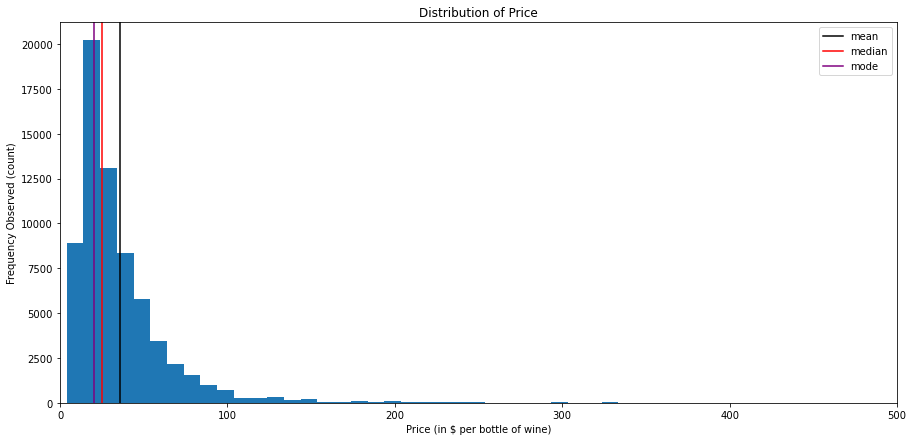

In [76]:
#plotting price for xtrain to visualize mean median mode 
plt.figure(figsize=(15,7))
plt.hist(X_train['price'], bins=250)
plt.axvline(X_train['price'].mean(), c="black", label="mean")
plt.axvline(X_train['price'].median(), c="red", label="median")
plt.axvline(X_train['price'].mode()[0], c="purple", label="mode")
plt.xlabel(f'Price (in $ per bottle of wine)')
plt.ylabel("Frequency Observed (count)")
plt.title(f"Distribution of Price")
plt.xlim(0,500)
plt.legend()
plt.show()

In the above histogram, we can see that the most appropriate option to fill the missing prices would be the mode, as it is located in the densest part of the histogram. Therefore, I will fill nulls in the `price` series using the mode for each country-variety combination. The reason I have chosen to base this on the country-variety combination is because the country of origin and grape variety of a wine influences its price in the U.S. (Arias-Bolzmann, et al., 2003). 

If there are any nulls left after this, then I will simply fill those nulls using the mode of prices by country (and if that leaves me with any wines with missing prices, I will use the overall mode). 

In [77]:
#capturing the most common prices for each country-variety combo
price_mode = X_train.groupby(['country','variety'])['price'].apply(pd.Series.mode)

#putting into DF
price_mode = pd.DataFrame(price_mode).reset_index()
price_mode

,country,variety,level_2,price
0,Argentina,Bonarda,0,15.0
1,Argentina,Bordeaux-style Red Blend,0,25.0
2,Argentina,Bordeaux-style White Blend,0,14.0
3,Argentina,Cabernet Blend,0,30.0
4,Argentina,Cabernet Franc,0,25.0
...,...,...,...,...
2228,Uruguay,Tannat-Merlot,1,16.0
2229,Uruguay,Tannat-Merlot,2,23.0
2230,Uruguay,Tannat-Merlot,3,29.0
2231,Uruguay,Tempranillo,0,22.0


In [78]:
#only including first mode and inspecting
price_mode = price_mode[price_mode.level_2 == 0]
display(price_mode)

,country,variety,level_2,price
0,Argentina,Bonarda,0,15.0
1,Argentina,Bordeaux-style Red Blend,0,25.0
2,Argentina,Bordeaux-style White Blend,0,14.0
3,Argentina,Cabernet Blend,0,30.0
4,Argentina,Cabernet Franc,0,25.0
...,...,...,...,...
2224,Uruguay,Tannat,0,20.0
2226,Uruguay,Tannat-Cabernet Franc,0,22.0
2227,Uruguay,Tannat-Merlot,0,13.0
2231,Uruguay,Tempranillo,0,22.0


In [79]:
#filling nulls in missing_price_train 
for i in price_mode.index:
    for j in missing_price_train.index:
        if (missing_price_train.country[j] == price_mode.country[i]) & (missing_price_train.variety[j] == price_mode.variety[i]):
            missing_price_train.price[j] = price_mode.price[i]

In [80]:
missing_price_train

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
91685,France,A flavor of black currant drop gives this wine...,15.0,Bordeaux,Roger Voss,@vossroger,Château l'Isle Fort 2009 Bordeaux Supérieur,Bordeaux-style Red Blend,Château l'Isle Fort
88711,France,"A fruity, light and very dry wine with a fragr...",20.0,Loire Valley,Roger Voss,@vossroger,Domaine de Vaugondy 2011 Sec (Vouvray),Chenin Blanc,Domaine de Vaugondy
25841,Slovenia,Honey and orange rind notes meld with a hint o...,NaN,Vipavska Dolina,Anna Lee C. Iijima,NaN,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
49606,France,Sweet fruits dominate this wine. It still has ...,25.0,Southwest France,Roger Voss,@vossroger,Château Haut-Monplaisir 2005 Prestige Malbec (...,Malbec,Château Haut-Monplaisir
108623,France,91–93. Barrel sample. The second wine of Cheva...,15.0,Bordeaux,Roger Voss,@vossroger,Le Petit Cheval 2012 Barrel Sample (Saint-Émi...,Bordeaux-style Red Blend,Le Petit Cheval
...,...,...,...,...,...,...,...,...,...
19915,Italy,Here's a fresh and clean rendition of Vernacci...,18.0,Tuscany,NaN,NaN,Mormoraia 2007 Vernaccia di San Gimignano,Vernaccia,Mormoraia
105479,Italy,"Creamy and crisp, this opens with aromas of pe...",18.0,Veneto,Kerin O’Keefe,@kerinokeefe,Andreola 2014 Ma's de Fer Rive di Soligo Extra...,Glera,Andreola
3217,Italy,This red blend from Umbria offers a decadent b...,25.0,Central Italy,NaN,NaN,Castello di Montegiove 2008 Elicius Red (Umbria),Red Blend,Castello di Montegiove
30605,Austria,Slender citrus zestiness is the theme here: is...,21.0,Wachau,Anne Krebiehl MW,@AnneInVino,Lagler 2012 1000 Eimerberg Smaragd Neuburger (...,Neuburger,Lagler


In [81]:
missing_price_train2 = missing_price_train.loc[missing_price_train.price.isna()]
print(missing_price_train2.shape)
missing_price_train2.head()

(24, 9)


,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
25841,Slovenia,Honey and orange rind notes meld with a hint o...,NaN,Vipavska Dolina,Anna Lee C. Iijima,NaN,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
93028,Italy,A pure expression of Grignolino (a popular gra...,NaN,Piedmont,NaN,NaN,Castello di Gabiano 2009 Il Ruvo Grignolino (M...,Grignolino,Castello di Gabiano
63460,France,Fermenting in oak and using the rare Petit Mes...,NaN,Champagne,Roger Voss,@vossroger,Duval-Leroy 2005 Authentis Brut Petit Meslier ...,Petit Meslier,Duval-Leroy
116970,Italy,"Roscetto, a little-known white grape from cent...",NaN,Central Italy,NaN,NaN,Falesco 2008 Ferentano Roscetto (Lazio),Roscetto,Falesco
13838,France,There are only a handful of acres of this Viti...,NaN,Burgundy,Roger Voss,@vossroger,Domaine Céline et Frédéric Gueguen 2014 Cépage...,Sacy,Domaine Céline et Frédéric Gueguen


I will now quickly calculate the most common price by country for the 24 wines that still do not have the price filled (the reason they did not previously get filled is likely that these 24 remaining wines are unique in the dataset in the sense that they have a unique country-variety combination...for example, there may not be any other Italian wines of the Roscetto variety in the dataset).

In [82]:
#capturing the most common prices for each country
price_mode = X_train.groupby(['country'])['price'].apply(pd.Series.mode)
#putting into DF
price_mode = pd.DataFrame(price_mode).reset_index()
price_mode = price_mode[price_mode.level_1 == 0]
price_mode

,country,level_1,price
0,Argentina,0,15.0
1,Armenia,0,14.0
3,Australia,0,20.0
4,Austria,0,20.0
5,Bosnia and Herzegovina,0,12.0
7,Brazil,0,15.0
8,Bulgaria,0,9.0
9,Canada,0,20.0
10,Chile,0,12.0
11,China,0,18.0


In [83]:
#filling nulls in missing_price_train 
for i in price_mode.index:
    for j in missing_price_train2.index:
        if (missing_price_train.country[j] == price_mode.country[i]):
            missing_price_train.price[j] = price_mode.price[i]

missing_price_train.loc[missing_price_train.price.isna()]

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


In [84]:
#check
missing_price_train

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
91685,France,A flavor of black currant drop gives this wine...,15.0,Bordeaux,Roger Voss,@vossroger,Château l'Isle Fort 2009 Bordeaux Supérieur,Bordeaux-style Red Blend,Château l'Isle Fort
88711,France,"A fruity, light and very dry wine with a fragr...",20.0,Loire Valley,Roger Voss,@vossroger,Domaine de Vaugondy 2011 Sec (Vouvray),Chenin Blanc,Domaine de Vaugondy
25841,Slovenia,Honey and orange rind notes meld with a hint o...,15.0,Vipavska Dolina,Anna Lee C. Iijima,NaN,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
49606,France,Sweet fruits dominate this wine. It still has ...,25.0,Southwest France,Roger Voss,@vossroger,Château Haut-Monplaisir 2005 Prestige Malbec (...,Malbec,Château Haut-Monplaisir
108623,France,91–93. Barrel sample. The second wine of Cheva...,15.0,Bordeaux,Roger Voss,@vossroger,Le Petit Cheval 2012 Barrel Sample (Saint-Émi...,Bordeaux-style Red Blend,Le Petit Cheval
...,...,...,...,...,...,...,...,...,...
19915,Italy,Here's a fresh and clean rendition of Vernacci...,18.0,Tuscany,NaN,NaN,Mormoraia 2007 Vernaccia di San Gimignano,Vernaccia,Mormoraia
105479,Italy,"Creamy and crisp, this opens with aromas of pe...",18.0,Veneto,Kerin O’Keefe,@kerinokeefe,Andreola 2014 Ma's de Fer Rive di Soligo Extra...,Glera,Andreola
3217,Italy,This red blend from Umbria offers a decadent b...,25.0,Central Italy,NaN,NaN,Castello di Montegiove 2008 Elicius Red (Umbria),Red Blend,Castello di Montegiove
30605,Austria,Slender citrus zestiness is the theme here: is...,21.0,Wachau,Anne Krebiehl MW,@AnneInVino,Lagler 2012 1000 Eimerberg Smaragd Neuburger (...,Neuburger,Lagler


In [85]:
#filling nulls in X_train.country using missing_country_train.country
for i in missing_price_train.index:
    X_train.price[i] = missing_price_train.price[i]

In [86]:
#checking nulls
X_train.isna().sum()

country                      0
description                  0
price                        0
province                     0
taster_name              14965
taster_twitter_handle    17703
title                        0
variety                      0
winery                       0
dtype: int64

In [87]:
X_train.isna().mean()*100

country                   0.000000
description               0.000000
price                     0.000000
province                  0.000000
taster_name              20.787032
taster_twitter_handle    24.590232
title                     0.000000
variety                   0.000000
winery                    0.000000
dtype: float64

Now that I have filled the nulls in `price`, I can move along to my final two columns: `taster_name` and `taster_twitter_handle`. As mentioned in Part 1 of this notebook, I will be filling the nulls in `taster_name` with the most frequent reviewer found in the training set (likely Roger Voss based on the distribution we saw in Part 1). For all rows that I fill nulls in `taster_name`, I will also fill the null for the same rows in the `taster_twitter_handle` series with the most frequent reviewer's twitter handle. 

### `taster_name` & `taster_twitter_handle`

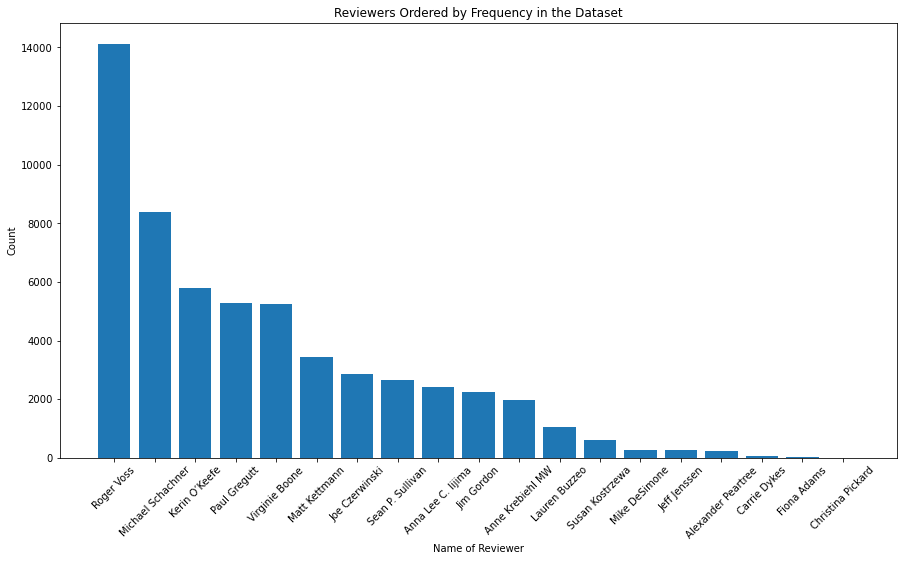

In [88]:
#confirm Roger Voss is the top reviewer in train. 

plt.figure(figsize=(15,8))
plt.bar(X_train['taster_name'].value_counts().index, X_train['taster_name'].value_counts().values)
plt.xlabel('Name of Reviewer')
plt.ylabel('Count')
plt.title('Reviewers Ordered by Frequency in the Dataset')
plt.xticks(rotation=45)
plt.show()

In [89]:
#getting mode
X_train.taster_name.mode()[0]

'Roger Voss'

In [90]:
#creating sub df of missing taster name for indexing 
missing_taster = X_train.loc[X_train.taster_name.isna()]
missing_taster

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
121795,Italy,This blend of Sangiovese and Montepulciano is ...,12.0,Central Italy,NaN,NaN,Barberani 2006 Polago Red (Umbria),Red Blend,Barberani
56346,Italy,"Toasted notes of roasted almond, popcorn, dark...",50.0,Sicily & Sardinia,NaN,NaN,Zisola 2006 Doppiozeta Red (Sicilia),Red Blend,Zisola
66273,US,With such pedigreed names as winemaker Aaron P...,50.0,California,NaN,NaN,Bello Family Vineyards 2010 Megahertz Cabernet...,Cabernet Sauvignon,Bello Family Vineyards
49109,Italy,This bright rosé from central Italy opens with...,19.0,Central Italy,NaN,NaN,Cantina Tollo 2009 Hedòs (Montepulciano d'Abr...,Rosé,Cantina Tollo
59363,US,Give this Syrah a good decant to take the edge...,35.0,California,NaN,NaN,James Family Cellars 2008 Mounts Vineyard Syra...,Syrah,James Family Cellars
...,...,...,...,...,...,...,...,...,...
46489,US,This new line from the well-regarded Testaross...,60.0,California,NaN,NaN,Testarossa 2012 Zinnia Grandiflora Pinot Noir ...,Pinot Noir,Testarossa
39812,US,"This Cab is in a somewhat awkward state now, p...",50.0,California,NaN,NaN,Clos Pegase 2009 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Clos Pegase
104911,Italy,Cortinie Bianco opens with impressive intensit...,25.0,Northeastern Italy,NaN,NaN,Peter Zemmer 2007 Cortinie Bianco White (Vigne...,White Blend,Peter Zemmer
302,Italy,This fresh Nebbiolo-based Roero from Cantina d...,50.0,Piedmont,NaN,NaN,Cantina del Nebbiolo 2008 Roero,Nebbiolo,Cantina del Nebbiolo


In [91]:
#getting twitter accounts for tasters
taster_twit = X_train.groupby('taster_name')['taster_twitter_handle'].first().to_frame()
taster_twit

,taster_twitter_handle
taster_name,
Alexander Peartree,None
Anna Lee C. Iijima,None
Anne Krebiehl MW,@AnneInVino
Carrie Dykes,None
Christina Pickard,@winewchristina
Fiona Adams,@bkfiona
Jeff Jenssen,@worldwineguys
Jim Gordon,@gordone_cellars
Joe Czerwinski,@JoeCz


In the above output, we can see which tasters have a twitter account associated with their wine tasting work, and which tasters do not. Interestingly, we can see that Jeff Jenssen and Mike DeSimone share a twitter account - their handle is @worldwineguys. 

In [92]:
#getting roger twitter acct handle
mode_twitter = taster_twit['taster_twitter_handle'][X_train.taster_name.mode()[0]]

In [93]:
#checking how many taster_name nulls
X_train.taster_name.isna().sum()

14965

In [94]:
#filling nulls with most frequent taster and their twitter acct name  
X_train['taster_name'].fillna(X_train.taster_name.mode()[0], inplace=True)

#check
X_train['taster_name'].isna().sum()

0

In [95]:
X_train['taster_twitter_handle'].isna().sum()

17703

In [96]:
#filling nulls with the most frequent taster twitter handle
for i in missing_taster.index:
    X_train['taster_twitter_handle'][i] = mode_twitter

#check
X_train['taster_twitter_handle'].isna().sum()

2738

In [97]:
#binarizing twitter_handle nulls
X_train['has_twitter'] = np.where(X_train['taster_twitter_handle'].notnull(), 1, 0)
X_train['has_twitter'].value_counts()

1    69254
0     2738
Name: has_twitter, dtype: int64

Now that I have created my feature that captures some of the information found in the `taster_twitter_handle` series numerically, I can drop the `taster_twitter_handle` (and `winery`) series. 

In [98]:
X_train = X_train.drop(['winery', 'taster_twitter_handle'], axis=1)

In [99]:
X_train.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        0
has_twitter    0
dtype: int64

Finally! I have a clean training dataset containing my features. I will quickly write a few python functions to speed up the process when filling nulls in my remainder, validation, and test sets. 

#### Building functions to make filling nulls easier for other sets

In [100]:
def fillna_country_prov(dataset, col):
    
    '''This function fills null values for the input column (country and province series) using complete column (country 
    or province) values associated with the missing value row's winery.
    This function was built to fill nulls in province or country columns only. 
    Important Note: this function updates the input dataset, and changes are not reversible. 
    
    Example of use: fillna_country_prov(x_remainder, country)
    
    This will return the rows in the input dataset with remaining missing values in the input column.'''
    
    #creating df of nulls 
    missing_col_data = dataset.loc[dataset[col].isna()]

    #creating df with only winery and the columns with complete info 
    winery_column = dataset[['winery', col]].dropna()

    #group by winery 
    winery_column = winery_column.groupby('winery').first()
    winery_column = winery_column.reset_index()

    #looping through to fill null columns with same winery found elsewhere
    for i in missing_col_data.index:
        for j in winery_column.index:
            if missing_col_data.winery[i] == winery_column.winery[j]:
                missing_col_data[col][i] = winery_column[col][j]
                
    for i in missing_col_data.index:
            dataset[col][i] = missing_col_data[col][i]
    
    still_missing_data = dataset.loc[dataset[col].isna()]
    still_missing_data_wineries = list(dataset.loc[dataset[col].isna()].winery.unique())

    return display(still_missing_data), still_missing_data_wineries

In [101]:
def fill_rem_prov(dataset, col):
    
    '''This function handles remaining nulls in the input column (province series). 
    This function should be used after the function fill_na_country_prov for the same input column (province).
    This function was built to address remaining nulls in the province series. 
    Important Note: this function updates the input dataset, and changes are not reversible. 
    
    Example of use: fill_rem_prov(X_remainder, 'province').
    This will return a view of any nulls remaining in province.'''

    #pulling missing vals
    missing_remain = dataset.loc[dataset[col].isna()]

    #getting prov mode by country-variety combo
    prov_mode = dataset.groupby(['country','variety'])[col].apply(pd.Series.mode)
    #putting into df
    prov_mode = pd.DataFrame(prov_mode).reset_index()
    #dropping all but first mode 
    prov_mode = prov_mode[prov_mode.level_2 == 0]

    #filling nan in missing remain
    for i in prov_mode.index:
        for j in missing_remain.index:
            if (missing_remain.country[j] == prov_mode.country[i]) & (missing_remain.variety[j] == prov_mode.variety[i]):
                missing_remain[col][j] = prov_mode[col][i]


    missing_remain2 = missing_remain.loc[missing_remain[col].isna()]

    #getting prov mode by country
    prov_mode = dataset.groupby(['country'])[col].apply(pd.Series.mode)
    #putting into df
    prov_mode = pd.DataFrame(prov_mode).reset_index()
    #dropping all but first mode 
    prov_mode = prov_mode[prov_mode.level_1 == 0]

    #filling nan in missing remain
    for i in prov_mode.index:
        for j in missing_remain2.index:
            if (missing_remain.country[j] == prov_mode.country[i]):
                missing_remain[col][j] = prov_mode[col][i]

    missing_remain[col].fillna(missing_remain['country'], inplace=True)

    for i in missing_remain.index:
        dataset[col][i] = missing_remain[col][i]

    leftover_col_nulls = dataset.loc[dataset[col].isna()]
    
    return leftover_col_nulls

In [102]:
def fill_rem_price(dataset, col):
    
    '''This function handles nulls in the input column (price series).
    This function was built to fill nulls in the price column.
    Important Note: this function updates the input dataset, and changes are not reversible. 
    
    Example of use: fill_rem_price(X_remainder, 'price').
    This will return a view of any nulls remaining in input column.'''

    #pulling missing vals
    missing_remain = dataset.loc[dataset[col].isna()]

    #getting prov mode by country-variety combo
    prov_mode = dataset.groupby(['country','variety'])[col].apply(pd.Series.mode)
    #putting into df
    prov_mode = pd.DataFrame(prov_mode).reset_index()
    #dropping all but first mode 
    prov_mode = prov_mode[prov_mode.level_2 == 0]

    #filling nan in missing remain
    for i in prov_mode.index:
        for j in missing_remain.index:
            if (missing_remain.country[j] == prov_mode.country[i]) & (missing_remain.variety[j] == prov_mode.variety[i]):
                missing_remain[col][j] = prov_mode[col][i]


    missing_remain2 = missing_remain.loc[missing_remain[col].isna()]

    #getting prov mode by country
    prov_mode = dataset.groupby(['country'])[col].apply(pd.Series.mode)
    #putting into df
    prov_mode = pd.DataFrame(prov_mode).reset_index()
    #dropping all but first mode 
    prov_mode = prov_mode[prov_mode.level_1 == 0]

    #filling nan in missing remain
    for i in prov_mode.index:
        for j in missing_remain2.index:
            if (missing_remain.country[j] == prov_mode.country[i]):
                missing_remain[col][j] = prov_mode[col][i]

    missing_remain[col].fillna(dataset[col].mode()[0], inplace=True)

    for i in missing_remain.index:
        dataset[col][i] = missing_remain[col][i]

    leftover_col_nulls = dataset.loc[dataset[col].isna()]
    
    return leftover_col_nulls

In [103]:
def fill_taster_twitter(dataset, col1, col2):

    '''This function is meant to fill nulls in the input columns (the taster_name & taster_twitter_handle). 
    
    This function will fill NaN of taster_name (ie col1) with the most frequent taster_name in the input dataset. 
    This function will also fill the taster_twitter_handle for that most frequent taster. 
    
    This function will then binarize taster_twitter_handle (col2) in a new column called has_twitter.
    
    Unfortunately the function could not drop col2 when called, so please drop col2 after you use this function.
    
    Important Note: this function updates the input dataset, and changes are not reversible. 
    
    Example of use: fill_taster_twitter(X_remainder, 'taster_name', 'taster_twitter_handle')'''
    
    #most frequent taster
    taster_mode = dataset[col1].mode()[0]

    #pulling missing vals
    missing_data = dataset.loc[dataset[col1].isna()]
    
    #getting twitter accounts for tasters
    taster_twit = dataset.groupby(col1)[col2].first().to_frame()

    #getting roger twitter acct handle
    mode_twitter = taster_twit[col2][taster_mode]

    #filling nulls with most frequent taster   
    dataset[col1].fillna(taster_mode, inplace=True)

    #filling nulls with the most frequent taster twitter handle
    for i in missing_data.index:
        dataset[col2][i] = mode_twitter
    
    #creating new col for has_twitter
    dataset['has_twitter'] = np.where(dataset[col2].notnull(),1,0)

    

    return dataset.head()

### Filling nulls in X_remainder

### `country`

In [104]:
fillna_country_prov(X_remainder, 'country')


,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
44851,NaN,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
85602,NaN,There's a pleasant fruity richness to this win...,36.0,NaN,Lauren Buzzeo,@laurbuzz,Lismore 2014 Chardonnay,Chardonnay,Lismore
129408,NaN,El Capricho is one of Uruguay's more consisten...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
26485,NaN,"This wine has aromas of black berry, dried red...",13.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
72581,NaN,This dry Furmint from Hungary's Balaton region...,21.0,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2014 Estate Furmint,Furmint,St. Donat
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",20.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
81955,NaN,This white blend is comprised of 50% Chardonna...,16.0,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2014 Nikolaevo Unison Chardonnay-Gewü...,White Blend,Ross-idi
79270,NaN,"This 100% Vranac is garnet in color, with arom...",11.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Premium Vranac,Vranac,Stone Castle
18075,NaN,Delicate white flowers and a spin of lemon pee...,17.0,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Askitikos Assyrtiko,Assyrtiko,Tsililis
49425,NaN,"This blend is comprised of 55% Merlot, 21% Cab...",28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2011 Getika Made With Organic Grapes Red,Red Blend,Orbelus


(None,
 ['Stone Castle',
  'Lismore',
  'El Capricho',
  'St. Donat',
  'Orbelus',
  'Ross-idi',
  'Tsililis',
  'Somlói Vándor',
  'Les Frères Dutruy'])

In [105]:
#filling nulls using Google search data
for i in X_remainder.index:
        if X_remainder.winery[i] == 'Stone Castle':
            X_remainder.country[i] = 'Kosovo'
        elif X_remainder.winery[i] == 'Lismore':
            X_remainder.country[i] = 'South Africa'
        elif X_remainder.winery[i] == 'El Capricho':
            X_remainder.country[i] = 'Uruguay'
        elif X_remainder.winery[i] == 'St. Donat':
            X_remainder.country[i] = 'Hungary'
        elif X_remainder.winery[i] == 'Orbelus':
            X_remainder.country[i] = 'Bulgaria'
        elif X_remainder.winery[i] == 'Ross-idi':
            X_remainder.country[i] = 'Bulgaria'
        elif X_remainder.winery[i] == 'Tsililis':
            X_remainder.country[i] = 'Greece'
        elif X_remainder.winery[i] == 'Somlói Vándor':
            X_remainder.country[i] = 'Hungary'
        elif X_remainder.winery[i] == 'Les Frères Dutruy':
            X_remainder.country[i] = 'Switzerland'
            
X_remainder.country.isna().sum()

0

### `province`

In [106]:
fillna_country_prov(X_remainder, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
44851,Kosovo,This wine has aromas of honeysuckle and lemon ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle
85602,South Africa,There's a pleasant fruity richness to this win...,36.0,NaN,Lauren Buzzeo,@laurbuzz,Lismore 2014 Chardonnay,Chardonnay,Lismore
129408,Uruguay,El Capricho is one of Uruguay's more consisten...,22.0,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
26485,Kosovo,"This wine has aromas of black berry, dried red...",13.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
72581,Hungary,This dry Furmint from Hungary's Balaton region...,21.0,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2014 Estate Furmint,Furmint,St. Donat
11150,Bulgaria,"A blend of 85% Melnik, 10% Grenache Noir and 5...",20.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
81955,Bulgaria,This white blend is comprised of 50% Chardonna...,16.0,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2014 Nikolaevo Unison Chardonnay-Gewü...,White Blend,Ross-idi
79270,Kosovo,"This 100% Vranac is garnet in color, with arom...",11.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Premium Vranac,Vranac,Stone Castle
18075,Greece,Delicate white flowers and a spin of lemon pee...,17.0,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Askitikos Assyrtiko,Assyrtiko,Tsililis
49425,Bulgaria,"This blend is comprised of 55% Merlot, 21% Cab...",28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2011 Getika Made With Organic Grapes Red,Red Blend,Orbelus


(None,
 ['Stone Castle',
  'Lismore',
  'El Capricho',
  'St. Donat',
  'Orbelus',
  'Ross-idi',
  'Tsililis',
  'Somlói Vándor',
  'Les Frères Dutruy'])

In [107]:
fill_rem_prov(X_remainder, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `price`

In [108]:
#fill remainder price
fill_rem_price(X_remainder, 'price')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `taster_name` & `taster_twitter_handle`

In [109]:
#filling taster name and twitter
fill_taster_twitter(X_remainder, 'taster_name', 'taster_twitter_handle')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery,has_twitter
26902,France,"This lush, concentrated Viognier combines cool...",124.0,Rhône Valley,Joe Czerwinski,@JoeCz,Paul Jaboulet Aîné 2014 Domaine des Grands Ama...,Viognier,Paul Jaboulet Aîné,1
76368,Portugal,"This is a forward, ripe and fruity wine that's...",8.0,Tejo,Roger Voss,@vossroger,Quinta do Casal Branco 2011 Terra de Lobos Red...,Portuguese Red,Quinta do Casal Branco,1
71583,Australia,No doubt informed by winemaker Daryl Groom's C...,26.0,South Australia,Joe Czerwinski,@JoeCz,Groom 2008 Bush Block Zinfandel (Barossa Valley),Zinfandel,Groom,1
101129,US,This reserve spends 30 months in barrel. It ha...,38.0,Washington,Paul Gregutt,@paulgwine,Camaraderie 2008 Reserve Merlot (Columbia Vall...,Merlot,Camaraderie,1
76809,US,Light black raspberry and purple-flower aromas...,25.0,California,Matt Kettmann,@mattkettmann,Cambria 2014 Benchbreak Pinot Noir (Santa Mari...,Pinot Noir,Cambria,1


In [110]:
#need to drop taster_twitter_handle and winery
X_remainder = X_remainder.drop(['winery', 'taster_twitter_handle'], axis=1)

In [111]:
#check if any nulls remaining in remainder
X_remainder.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        1
has_twitter    0
dtype: int64

### `variety`

In [112]:
#checking for that single null value in variety
X_remainder.loc[X_remainder.variety.isna()]

,country,description,price,province,taster_name,title,variety,has_twitter
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",17.0,Maipo Valley,Roger Voss,Carmen 1999 (Maipo Valley),NaN,1


In [113]:
#check if variety can be found by reading the description, if not, we will fill variety with most common variety in prov
X_remainder['description'][86909]

"A chalky, dusty mouthfeel nicely balances this Petite Syrah's bright, full blackberry and blueberry fruit. Wheat-flour and black-pepper notes add interest to the bouquet; the wine finishes with herb and an acorny nuttiness. A good first Chilean wine for those more comfortable with the Californian style. It's got tannins to lose, but it's very good."

In [114]:
#bingo - it is a syrah
X_remainder['variety'][86909] = 'Syrah'
X_remainder.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        0
has_twitter    0
dtype: int64

In [115]:
X_remainder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95990 entries, 26902 to 68946
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      95990 non-null  object 
 1   description  95990 non-null  object 
 2   price        95990 non-null  float64
 3   province     95990 non-null  object 
 4   taster_name  95990 non-null  object 
 5   title        95990 non-null  object 
 6   variety      95990 non-null  object 
 7   has_twitter  95990 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 8.2+ MB


X_train and X_remainder have both been cleaned. Now moving onto X_valid. 

### Filling nulls in X_valid

### `country`

In [116]:
fillna_country_prov(X_valid, 'country')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
60678,NaN,"This wine was made for grilled meats, with its...",17.0,NaN,Susan Kostrzewa,@suskostrzewa,Ktima Voyatzi 2015 Dry Rosé,Rosé,Ktima Voyatzi
90151,NaN,This medium-straw-colored wine has aromas of c...,25.0,NaN,Jeff Jenssen,@worldwineguys,Somlói Vándor 2015 Furmint,Furmint,Somlói Vándor
913,NaN,"Amber in color, this wine has aromas of peach ...",30.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
9750,NaN,This orange-style wine has a cloudy yellow-gol...,28.0,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
120799,NaN,"Cigar box, cedar and red fruit aromas start th...",27.0,NaN,Susan Kostrzewa,@suskostrzewa,Ktima Voyatzi 2014 Tsapournakos,Tsapournakos,Ktima Voyatzi
66524,NaN,"Amber to the eye, this wine features an entici...",25.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2015 Dry Unfiltered Rkatsit...,White Blend,Gotsa Family Wines


(None, ['Ktima Voyatzi', 'Somlói Vándor', 'Gotsa Family Wines', 'Ross-idi'])

In [117]:
#filling nulls using Google search data
for i in X_valid.index:
        if X_valid.winery[i] == 'Ktima Voyatzi':
            X_valid.country[i] = 'Greece'
        elif X_valid.winery[i] == 'Somlói Vándor':
            X_valid.country[i] = 'Hungary'
        elif X_valid.winery[i] == 'Gotsa Family Wines':
            X_valid.country[i] = 'Georgia'
        elif X_valid.winery[i] == 'Ross-idi':
            X_valid.country[i] = 'Bulgaria'


            
X_valid.country.isna().sum()

0

### `province`

In [118]:
fillna_country_prov(X_valid, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
60678,Greece,"This wine was made for grilled meats, with its...",17.0,NaN,Susan Kostrzewa,@suskostrzewa,Ktima Voyatzi 2015 Dry Rosé,Rosé,Ktima Voyatzi
90151,Hungary,This medium-straw-colored wine has aromas of c...,25.0,NaN,Jeff Jenssen,@worldwineguys,Somlói Vándor 2015 Furmint,Furmint,Somlói Vándor
913,Georgia,"Amber in color, this wine has aromas of peach ...",30.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
9750,Bulgaria,This orange-style wine has a cloudy yellow-gol...,28.0,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
120799,Greece,"Cigar box, cedar and red fruit aromas start th...",27.0,NaN,Susan Kostrzewa,@suskostrzewa,Ktima Voyatzi 2014 Tsapournakos,Tsapournakos,Ktima Voyatzi
66524,Georgia,"Amber to the eye, this wine features an entici...",25.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2015 Dry Unfiltered Rkatsit...,White Blend,Gotsa Family Wines


(None, ['Ktima Voyatzi', 'Somlói Vándor', 'Gotsa Family Wines', 'Ross-idi'])

In [119]:
fill_rem_prov(X_valid, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `price`

In [120]:
#fill remainder price
fill_rem_price(X_valid, 'price')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `twitter_name` & `taster_twitter_handle`

In [121]:
#filling taster name and twitter
fill_taster_twitter(X_valid, 'taster_name', 'taster_twitter_handle')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery,has_twitter
53454,US,"Very dry and pretty tannic, this cool-climate ...",40.0,California,Roger Voss,@vossroger,Keller Estate 2007 La Cruz Vineyard Syrah (Son...,Syrah,Keller Estate,1
108368,France,Ripe berry fruits shine through this wine. Sup...,25.0,Bordeaux,Roger Voss,@vossroger,Château Bois de Rolland 2012 Cuvée Prestige (...,Bordeaux-style Red Blend,Château Bois de Rolland,1
75996,US,This new winery from 14-year Bonny Doon assist...,28.0,California,Matt Kettmann,@mattkettmann,Ser 2013 Coastview Vineyard Chardonnay (Monter...,Chardonnay,Ser,1
24020,US,"Toast, spice, lees and baked-apple aromas are ...",22.0,Washington,Sean P. Sullivan,@wawinereport,Three Rivers 2014 Reserve Chardonnay (Columbia...,Chardonnay,Three Rivers,1
48787,Spain,Aromas of peach pit are neutral except for som...,17.0,Catalonia,Michael Schachner,@wineschach,Huguet de Can Feixes 2014 Blanc Selecció White...,White Blend,Huguet de Can Feixes,1


In [122]:
#need to drop taster_twitter_handle and winery
X_valid = X_valid.drop(['winery', 'taster_twitter_handle'], axis=1)

In [123]:
#check
X_valid.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        1
has_twitter    0
dtype: int64

### `variety`

In [124]:
#check for single null in variety
X_valid.loc[X_valid.variety.isna()]

,country,description,price,province,taster_name,title,variety,has_twitter
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",17.0,Maipo Valley,Roger Voss,Carmen 1999 (Maipo Valley),NaN,1


In [125]:
X_valid['description'][86909]

"A chalky, dusty mouthfeel nicely balances this Petite Syrah's bright, full blackberry and blueberry fruit. Wheat-flour and black-pepper notes add interest to the bouquet; the wine finishes with herb and an acorny nuttiness. A good first Chilean wine for those more comfortable with the Californian style. It's got tannins to lose, but it's very good."

In [126]:
#bingo again - Syrah! 
X_valid['variety'][86909] = 'Syrah'
X_valid.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        0
has_twitter    0
dtype: int64

X_valid no longer has any null values present. Moving onto my final dataset: X_test.

### Filling nulls in X_test

### `country`

In [127]:
fillna_country_prov(X_test, 'country')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
54222,NaN,"Almost caramel in color, this wine offers arom...",30.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2013 Babaneuri Valley Mtsvane,Mtsvane,Gotsa Family Wines
49427,NaN,This dark-garnet wine has aromas of eucalyptus...,19.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Hrumki Syrah Melnik 55 Mourvèdre ...,Red Blend,Orbelus
27822,NaN,"This is a reasonably rich, concentrated exampl...",19.0,NaN,Joe Czerwinski,@JoeCz,Mt. Beautiful 2014 Pinot Gris,Pinot Gris,Mt. Beautiful
44850,NaN,This blend of Gamay and Prokupe has aromas of ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Amphora Red,Red Blend,Stone Castle
9509,NaN,This mouthwatering blend starts with a nose of...,28.0,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
4243,NaN,"Violet-red in color, this semisweet wine has a...",18.0,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
85603,NaN,Made from 100% Melnick this garnet-colored win...,23.0,NaN,Jeff Jenssen,@worldwineguys,Logodaj 2013 Nobile Melnik,Melnik,Logodaj
16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen
49426,NaN,Enticing aromas of blueberry syrup open this b...,28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2012 Getika Made With Organic Grapes Red,Red Blend,Orbelus
119787,NaN,This deep red-violet wine has a nose of blackb...,30.0,NaN,Mike DeSimone,@worldwineguys,Amiran Vepkhvadze 2014 Otskhanuri Sapere,Otskhanuri Sapere,Amiran Vepkhvadze


(None,
 ['Gotsa Family Wines',
  'Orbelus',
  'Mt. Beautiful',
  'Stone Castle',
  'Tsililis',
  'Kakhetia Traditional Winemaking',
  'Logodaj',
  'Bartho Eksteen',
  'Amiran Vepkhvadze',
  'Ross-idi',
  'Büyülübağ',
  'Bachelder',
  'El Capricho',
  'St. Donat',
  'Les Frères Dutruy'])

In [128]:
#filling nulls using Google search data
for i in X_test.index:
        if X_test.winery[i] == 'Gotsa Family Wines':
            X_test.country[i] = 'Georgia'
        elif X_test.winery[i] == 'Orbelus':
            X_test.country[i] = 'Bulgaria'
        elif X_test.winery[i] == 'Mt. Beautiful':
            X_test.country[i] = 'New Zealand'
        elif X_test.winery[i] == 'Stone Castle':
            X_test.country[i] = 'Kosovo'
        elif X_test.winery[i] == 'Tsililis':
            X_test.country[i] = 'Greece'
        elif X_test.winery[i] == 'Kakhetia Traditional Winemaking':
            X_test.country[i] = 'Georgia'
        elif X_test.winery[i] == 'Logodaj':
            X_test.country[i] = 'Bulgaria'
        elif X_test.winery[i] == 'Bartho Eksteen':
            X_test.country[i] = 'South Africa'
        elif X_test.winery[i] == 'Amiran Vepkhvadze':
            X_test.country[i] = 'Georgia'
        elif X_test.winery[i] == 'Ross-idi':
            X_test.country[i] = 'Bulgaria'
        elif X_test.winery[i] == 'Büyülübağ':
            X_test.country[i] = 'Turkey'
        elif X_test.winery[i] == 'Bachelder':
            X_test.country[i] = 'Canada'
        elif X_test.winery[i] == 'El Capricho':
            X_test.country[i] = 'Uruguay'
        elif X_test.winery[i] == 'St. Donat':
            X_test.country[i] = 'Hungary'
        elif X_test.winery[i] == 'Les Frères Dutruy':
            X_test.country[i] = 'Switzerland'
            
    
X_test.country.isna().sum()

0

### `province`

In [129]:
#filling province nulls step 1
fillna_country_prov(X_test, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery
54222,Georgia,"Almost caramel in color, this wine offers arom...",30.0,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2013 Babaneuri Valley Mtsvane,Mtsvane,Gotsa Family Wines
49427,Bulgaria,This dark-garnet wine has aromas of eucalyptus...,19.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Hrumki Syrah Melnik 55 Mourvèdre ...,Red Blend,Orbelus
27822,New Zealand,"This is a reasonably rich, concentrated exampl...",19.0,NaN,Joe Czerwinski,@JoeCz,Mt. Beautiful 2014 Pinot Gris,Pinot Gris,Mt. Beautiful
44850,Kosovo,This blend of Gamay and Prokupe has aromas of ...,6.0,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Amphora Red,Red Blend,Stone Castle
9509,Greece,This mouthwatering blend starts with a nose of...,28.0,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
4243,Georgia,"Violet-red in color, this semisweet wine has a...",18.0,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
85603,Bulgaria,Made from 100% Melnick this garnet-colored win...,23.0,NaN,Jeff Jenssen,@worldwineguys,Logodaj 2013 Nobile Melnik,Melnik,Logodaj
16749,South Africa,Winemaker: Bartho Eksteen. This wooded Sauvy s...,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen
49426,Bulgaria,Enticing aromas of blueberry syrup open this b...,28.0,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2012 Getika Made With Organic Grapes Red,Red Blend,Orbelus
119787,Georgia,This deep red-violet wine has a nose of blackb...,30.0,NaN,Mike DeSimone,@worldwineguys,Amiran Vepkhvadze 2014 Otskhanuri Sapere,Otskhanuri Sapere,Amiran Vepkhvadze


(None,
 ['Gotsa Family Wines',
  'Orbelus',
  'Mt. Beautiful',
  'Stone Castle',
  'Tsililis',
  'Kakhetia Traditional Winemaking',
  'Logodaj',
  'Bartho Eksteen',
  'Amiran Vepkhvadze',
  'Ross-idi',
  'Büyülübağ',
  'Bachelder',
  'El Capricho',
  'St. Donat',
  'Les Frères Dutruy'])

In [130]:
#filling province nulls sstep 2
fill_rem_prov(X_test, 'province')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `price`

In [131]:
#filling price nulls 
fill_rem_price(X_test, 'price')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery


### `taster_name` & `taster_twitter_handle`

In [132]:
#filling taster name and twitter
fill_taster_twitter(X_test, 'taster_name', 'taster_twitter_handle')

,country,description,price,province,taster_name,taster_twitter_handle,title,variety,winery,has_twitter
113294,France,"A fresh, lightly herbal blend of most of the g...",10.0,Southwest France,Roger Voss,@vossroger,Domaine de Joÿ 2015 L'Eclat White (Côtes de Ga...,White Blend,Domaine de Joÿ,1
5433,US,The historic winery's most widely accessible b...,25.0,California,Matt Kettmann,@mattkettmann,Zaca Mesa 2012 Syrah (Santa Ynez Valley),Syrah,Zaca Mesa,1
48484,Italy,Here's a no-fuss Sangiovese blend that exhibit...,12.0,Central Italy,Roger Voss,@vossroger,Castello Monte Vibiano Vecchio 2004 Villa Mont...,Sangiovese,Castello Monte Vibiano Vecchio,1
44495,US,"This blend of Chardonnay (44%), Viognier (39%)...",25.0,Washington,Sean P. Sullivan,@wawinereport,Patterson 2015 Melange Blanc White (Columbia V...,White Blend,Patterson,1
50874,US,There's not much going on with this soft Mosca...,15.0,California,Roger Voss,@vossroger,Bianchi 2011 Moscato (Paso Robles),Moscato,Bianchi,1


In [133]:
#need to drop taster_twitter_handle and winery
X_test = X_test.drop(['winery', 'taster_twitter_handle'], axis=1)

#check for nulls
X_test.isna().sum()

country        0
description    0
price          0
province       0
taster_name    0
title          0
variety        0
has_twitter    0
dtype: int64

In [134]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23998 entries, 113294 to 68853
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      23998 non-null  object 
 1   description  23998 non-null  object 
 2   price        23998 non-null  float64
 3   province     23998 non-null  object 
 4   taster_name  23998 non-null  object 
 5   title        23998 non-null  object 
 6   variety      23998 non-null  object 
 7   has_twitter  23998 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 2.1+ MB


Finally, we have clean data! I will now move onto Feature Engineering. 

<a id="feat"></a>
## 2.4 - Feature Engineering

There are two main features I would like to create. The first is to extract the vintage (i.e. year) of the wine being reviewed, which can be found in the `title` series. Once I extract that information, I will likely drop the `title` column from all sets. 
The second feature I would like to create is the word count of the `description` series. As we saw in Part 1, there seemed to be a positive correlation between word count and `points`.

In [135]:
#import re 

#for xtrain
X_train['vintage'] = X_train['title'].str.extract(r'(19[0-9][0-9]|20[0-9][0-9])')

#for xremainder
X_remainder['vintage'] = X_remainder['title'].str.extract(r'(19\d{2}|20\d{2})')

#for x_valid
X_valid['vintage'] = X_valid['title'].str.extract(r'(19\d{2}|20\d{2})')

#finally for x_test
X_test['vintage'] = X_test['title'].str.extract(r'(19\d{2}|20\d{2})')

In [136]:
X_train.vintage.isna().sum()

2631

In [137]:
X_remainder.vintage.isna().sum()

3443

In [138]:
X_valid.vintage.isna().sum()

812

In [139]:
X_test.vintage.isna().sum()

842

We have some nulls here. I will simply fill these nulls using the most frequent harvest year found in the respective set. 

In [140]:
#converting vintage to datetime for train
X_train.vintage = pd.to_datetime(X_train.vintage)

#converting vintage to datetime for remain
X_remainder.vintage = pd.to_datetime(X_remainder.vintage)

#converting vintage to datetime for valid
X_valid.vintage = pd.to_datetime(X_valid.vintage)

#converting vintage to datetime for test
X_test.vintage = pd.to_datetime(X_test.vintage)

In [141]:
#filling nulls for all sets

X_train.vintage.fillna(X_train.vintage.mode()[0], inplace=True)

X_remainder.vintage.fillna(X_remainder.vintage.mode()[0], inplace=True)

X_valid.vintage.fillna(X_valid.vintage.mode()[0], inplace=True)

X_test.vintage.fillna(X_test.vintage.mode()[0], inplace=True)

In [142]:
#check
print(X_train.vintage.isna().sum())
print(X_remainder.vintage.isna().sum())
print(X_valid.vintage.isna().sum())
print(X_test.vintage.isna().sum())

0
0
0
0


Now that I have my `vintage` feature, I can move onto creating one more feature: `word_count`.

In [143]:
#word count for X_train
X_train['word_count'] = X_train['description'].apply(len)

#word count for X_remainder
X_remainder['word_count'] = X_remainder['description'].apply(len)

#word count for X_valid
X_valid['word_count'] = X_valid['description'].apply(len)

#word count for X_test
X_test['word_count'] = X_test['description'].apply(len)

In [144]:
#check
print(X_train.word_count.isna().sum())
print(X_remainder.word_count.isna().sum())
print(X_valid.word_count.isna().sum())
print(X_test.word_count.isna().sum())

0
0
0
0


In [145]:
X_train

,country,description,price,province,taster_name,title,variety,has_twitter,vintage,word_count
118191,US,"A shy, mineral-leaning nose offers pencil shav...",30.0,California,Matt Kettmann,Fess Parker 2012 Pinot Noir (Sta. Rita Hills),Pinot Noir,1,2012-01-01,201
121795,Italy,This blend of Sangiovese and Montepulciano is ...,12.0,Central Italy,Roger Voss,Barberani 2006 Polago Red (Umbria),Red Blend,1,2006-01-01,274
51208,Argentina,"Brambly and wild on the nose, this Cafayate Ma...",20.0,Other,Michael Schachner,Altocedro 2013 Abras Malbec (Cafayate),Malbec,1,2013-01-01,246
32362,US,Very primary aromas of lime zest and mineral a...,18.0,Washington,Sean P. Sullivan,Sleight of Hand 2015 The Magician Evergreen Vi...,Riesling,1,2015-01-01,144
56346,Italy,"Toasted notes of roasted almond, popcorn, dark...",50.0,Sicily & Sardinia,Roger Voss,Zisola 2006 Doppiozeta Red (Sicilia),Red Blend,1,2006-01-01,226
...,...,...,...,...,...,...,...,...,...,...
53212,Chile,"The nose is lemony, warm and floral. It feels ...",20.0,Cachapoal Valley,Michael Schachner,Rios de Chile 2008 Gran Reserva Cabernet Sauvi...,Cabernet Sauvignon,1,2008-01-01,194
94717,US,"As the producer's first 100% Syrah, this impre...",49.0,California,Virginie Boone,Marimar Estate 2012 Don Miguel Vineyard Estate...,Syrah,1,2012-01-01,261
91411,France,This is a very fresh and fragrant style of Tav...,18.0,Rhône Valley,Joe Czerwinski,Château de Trinquevedel 2012 Tavel,Rosé,1,2012-01-01,260
103815,US,"Hugely extracted in cherry pie flavors, this M...",38.0,California,Roger Voss,Frog's Leap 2010 Merlot (Rutherford),Merlot,1,2010-01-01,185


In [146]:
import datetime as dt

#making sure we only have year extracted for all sets

X_train['vintage'] = X_train['vintage'].dt.year

X_remainder['vintage'] = X_remainder['vintage'].dt.year

X_valid['vintage'] = X_valid['vintage'].dt.year

X_test['vintage'] = X_test['vintage'].dt.year

In [147]:
#check
X_train

,country,description,price,province,taster_name,title,variety,has_twitter,vintage,word_count
118191,US,"A shy, mineral-leaning nose offers pencil shav...",30.0,California,Matt Kettmann,Fess Parker 2012 Pinot Noir (Sta. Rita Hills),Pinot Noir,1,2012,201
121795,Italy,This blend of Sangiovese and Montepulciano is ...,12.0,Central Italy,Roger Voss,Barberani 2006 Polago Red (Umbria),Red Blend,1,2006,274
51208,Argentina,"Brambly and wild on the nose, this Cafayate Ma...",20.0,Other,Michael Schachner,Altocedro 2013 Abras Malbec (Cafayate),Malbec,1,2013,246
32362,US,Very primary aromas of lime zest and mineral a...,18.0,Washington,Sean P. Sullivan,Sleight of Hand 2015 The Magician Evergreen Vi...,Riesling,1,2015,144
56346,Italy,"Toasted notes of roasted almond, popcorn, dark...",50.0,Sicily & Sardinia,Roger Voss,Zisola 2006 Doppiozeta Red (Sicilia),Red Blend,1,2006,226
...,...,...,...,...,...,...,...,...,...,...
53212,Chile,"The nose is lemony, warm and floral. It feels ...",20.0,Cachapoal Valley,Michael Schachner,Rios de Chile 2008 Gran Reserva Cabernet Sauvi...,Cabernet Sauvignon,1,2008,194
94717,US,"As the producer's first 100% Syrah, this impre...",49.0,California,Virginie Boone,Marimar Estate 2012 Don Miguel Vineyard Estate...,Syrah,1,2012,261
91411,France,This is a very fresh and fragrant style of Tav...,18.0,Rhône Valley,Joe Czerwinski,Château de Trinquevedel 2012 Tavel,Rosé,1,2012,260
103815,US,"Hugely extracted in cherry pie flavors, this M...",38.0,California,Roger Voss,Frog's Leap 2010 Merlot (Rutherford),Merlot,1,2010,185


In [148]:
#since we have extracted year i can drop title for all sets

X_train.drop('title', axis=1, inplace=True)

X_remainder.drop('title', axis=1, inplace=True)

X_valid.drop('title', axis=1, inplace=True)

X_test.drop('title', axis=1, inplace=True)

In [149]:
#check
X_train

,country,description,price,province,taster_name,variety,has_twitter,vintage,word_count
118191,US,"A shy, mineral-leaning nose offers pencil shav...",30.0,California,Matt Kettmann,Pinot Noir,1,2012,201
121795,Italy,This blend of Sangiovese and Montepulciano is ...,12.0,Central Italy,Roger Voss,Red Blend,1,2006,274
51208,Argentina,"Brambly and wild on the nose, this Cafayate Ma...",20.0,Other,Michael Schachner,Malbec,1,2013,246
32362,US,Very primary aromas of lime zest and mineral a...,18.0,Washington,Sean P. Sullivan,Riesling,1,2015,144
56346,Italy,"Toasted notes of roasted almond, popcorn, dark...",50.0,Sicily & Sardinia,Roger Voss,Red Blend,1,2006,226
...,...,...,...,...,...,...,...,...,...
53212,Chile,"The nose is lemony, warm and floral. It feels ...",20.0,Cachapoal Valley,Michael Schachner,Cabernet Sauvignon,1,2008,194
94717,US,"As the producer's first 100% Syrah, this impre...",49.0,California,Virginie Boone,Syrah,1,2012,261
91411,France,This is a very fresh and fragrant style of Tav...,18.0,Rhône Valley,Joe Czerwinski,Rosé,1,2012,260
103815,US,"Hugely extracted in cherry pie flavors, this M...",38.0,California,Roger Voss,Merlot,1,2010,185


Now that I have clean training, validation, testing, and remainder sets, I will save these to a csv file on my local machine to have the ability to read in those files if necessary in the future. Once I save those files to my local computer, I will encode my categorical variables and finally, vectorize my text data. 

In [150]:
#exporting all sets to csv files, but first adding y back to x

#start wiht train
training_data = X_train.copy()
training_data['points'] = y_train
training_data = training_data.reset_index().drop('index', axis =1)
training_data.to_csv('capstone_final/clean_train_data.csv', index=False)

In [151]:
#remainder set
remainder_data = X_remainder.copy()
remainder_data['points'] = y_remainder
remainder_data = remainder_data.reset_index().drop('index', axis =1)
remainder_data.to_csv('capstone_final/clean_remainder_data.csv', index=False)

In [152]:
#validation set
validation_data = X_valid.copy()
validation_data['points'] = y_valid
validation_data = validation_data.reset_index().drop('index', axis =1)
validation_data.to_csv('capstone_final/clean_validation_data.csv', index=False)

In [153]:
#testing data
testing_data = X_test.copy()
testing_data['points'] = y_test
testing_data = testing_data.reset_index().drop('index', axis =1)
testing_data.to_csv('capstone_final/clean_test_data.csv', index=False)

<a id="encode"></a>
## 2.5 - Encoding Categorical Columns

In [154]:
#check dtypes for train set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71992 entries, 118191 to 108624
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      71992 non-null  object 
 1   description  71992 non-null  object 
 2   price        71992 non-null  float64
 3   province     71992 non-null  object 
 4   taster_name  71992 non-null  object 
 5   variety      71992 non-null  object 
 6   has_twitter  71992 non-null  int32  
 7   vintage      71992 non-null  int64  
 8   word_count   71992 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 7.2+ MB


In [155]:
#check dtypes for remainder
X_remainder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95990 entries, 26902 to 68946
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      95990 non-null  object 
 1   description  95990 non-null  object 
 2   price        95990 non-null  float64
 3   province     95990 non-null  object 
 4   taster_name  95990 non-null  object 
 5   variety      95990 non-null  object 
 6   has_twitter  95990 non-null  int32  
 7   vintage      95990 non-null  int64  
 8   word_count   95990 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 9.0+ MB


In [156]:
#check dtypes for valid
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23998 entries, 53454 to 99145
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      23998 non-null  object 
 1   description  23998 non-null  object 
 2   price        23998 non-null  float64
 3   province     23998 non-null  object 
 4   taster_name  23998 non-null  object 
 5   variety      23998 non-null  object 
 6   has_twitter  23998 non-null  int32  
 7   vintage      23998 non-null  int64  
 8   word_count   23998 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 2.2+ MB


In [157]:
#check dtypes for test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23998 entries, 113294 to 68853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      23998 non-null  object 
 1   description  23998 non-null  object 
 2   price        23998 non-null  float64
 3   province     23998 non-null  object 
 4   taster_name  23998 non-null  object 
 5   variety      23998 non-null  object 
 6   has_twitter  23998 non-null  int32  
 7   vintage      23998 non-null  int64  
 8   word_count   23998 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 2.2+ MB


In [158]:
#list of categorical col names
categorical_cols = ['country', 'province', 'taster_name', 'variety']

In [159]:
#making copies of categories Xtrain valid and test
X_tr = X_train[categorical_cols]
X_val = X_valid[categorical_cols]
X_te = X_test[categorical_cols]

In [160]:
#importing col transformer
from sklearn.compose import make_column_transformer
#importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#instantiate
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [161]:
#instantiate col transformer
transformer = make_column_transformer((ohe,['country', 'province', 'taster_name', 'variety']), 
                                      remainder='passthrough')

#fit_transform on train
train_cat_transformed = transformer.fit_transform(X_tr)
train_cat_transformed_df = pd.DataFrame(train_cat_transformed.toarray(), columns=transformer.get_feature_names())

#transform valid
valid_cat_transformed = transformer.transform(X_val)
valid_cat_transformed_df = pd.DataFrame(valid_cat_transformed.toarray(), columns=transformer.get_feature_names())

#transform test
test_cat_transformed = transformer.transform(X_te)
test_cat_transformed_df = pd.DataFrame(test_cat_transformed.toarray(), columns=transformer.get_feature_names())

In [162]:
print(train_cat_transformed_df.shape)
display(train_cat_transformed_df.head())
print(valid_cat_transformed_df.shape)
display(valid_cat_transformed_df.head())
print(test_cat_transformed_df.shape)
display(test_cat_transformed_df.head())

(71992, 1094)


,onehotencoder__x0_Argentina,onehotencoder__x0_Armenia,onehotencoder__x0_Australia,onehotencoder__x0_Austria,onehotencoder__x0_Bosnia and Herzegovina,onehotencoder__x0_Brazil,onehotencoder__x0_Bulgaria,onehotencoder__x0_Canada,onehotencoder__x0_Chile,onehotencoder__x0_China,...,onehotencoder__x3_Xinomavro,onehotencoder__x3_Xynisteri,onehotencoder__x3_Zelen,onehotencoder__x3_Zibibbo,onehotencoder__x3_Zierfandler,onehotencoder__x3_Zierfandler-Rotgipfler,onehotencoder__x3_Zinfandel,onehotencoder__x3_Zlahtina,onehotencoder__x3_Zweigelt,onehotencoder__x3_Çalkarası
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(23998, 1094)


,onehotencoder__x0_Argentina,onehotencoder__x0_Armenia,onehotencoder__x0_Australia,onehotencoder__x0_Austria,onehotencoder__x0_Bosnia and Herzegovina,onehotencoder__x0_Brazil,onehotencoder__x0_Bulgaria,onehotencoder__x0_Canada,onehotencoder__x0_Chile,onehotencoder__x0_China,...,onehotencoder__x3_Xinomavro,onehotencoder__x3_Xynisteri,onehotencoder__x3_Zelen,onehotencoder__x3_Zibibbo,onehotencoder__x3_Zierfandler,onehotencoder__x3_Zierfandler-Rotgipfler,onehotencoder__x3_Zinfandel,onehotencoder__x3_Zlahtina,onehotencoder__x3_Zweigelt,onehotencoder__x3_Çalkarası
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(23998, 1094)


,onehotencoder__x0_Argentina,onehotencoder__x0_Armenia,onehotencoder__x0_Australia,onehotencoder__x0_Austria,onehotencoder__x0_Bosnia and Herzegovina,onehotencoder__x0_Brazil,onehotencoder__x0_Bulgaria,onehotencoder__x0_Canada,onehotencoder__x0_Chile,onehotencoder__x0_China,...,onehotencoder__x3_Xinomavro,onehotencoder__x3_Xynisteri,onehotencoder__x3_Zelen,onehotencoder__x3_Zibibbo,onehotencoder__x3_Zierfandler,onehotencoder__x3_Zierfandler-Rotgipfler,onehotencoder__x3_Zinfandel,onehotencoder__x3_Zlahtina,onehotencoder__x3_Zweigelt,onehotencoder__x3_Çalkarası
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that I have encoded my categorical features using OneHotEncoder, and have confirmed that there are the same number of columns in all transformed dataframes, I can move onto to converting my target (for all 3 sets) and then dive into the NLP process with vectorizing my text data. During my exploration of the dataset, we saw that the median of my target `points` was 88 points. For this reason, and to limit a class imbalance, I have decided to classify wines with scores greater than the median as 'good' wines (class 1) and wines with scores equal to or below the median to be classified as 'bad' wines (class 0). 

In [163]:
#setting up classes in my y's
y_train_final = np.where(y_train > 88, 1, 0)
y_valid_final = np.where(y_valid > 88, 1, 0)
y_test_final = np.where(y_test > 88, 1, 0)

In [164]:
#check shape
print(y_train_final.shape)
print(y_valid_final.shape)
print(y_test_final.shape)

(71992,)
(23998,)
(23998,)


In [165]:
#check if null
print(pd.DataFrame(y_train_final).isna().sum())
print(pd.DataFrame(y_valid_final).isna().sum())
print(pd.DataFrame(y_test_final).isna().sum())

0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64


<a id="vector"></a>
## 2.6 - Vectorizing Text Data with TF-IDF Vectorizer

Now that I have encoded my categorical columns, I will now use TF-IDF to vectorize my text data, aka my `description` column.

In [166]:
#importing tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#import string
import string

#and nltk 
import nltk

In [167]:
#Credit to Arad for below code from lecture TextData

nltk.download('stopwords')
from nltk.corpus import stopwords 
stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
# Instantiate vectorizer 
tfidf = TfidfVectorizer(min_df = 0.01, tokenizer=my_tokenizer)

In [169]:
#make sub df of only text data 
train_description = X_train['description']
valid_description = X_valid['description']
test_description = X_test['description']


#fit descriptions
tfidf.fit(train_description)

# transform
train_text = tfidf.transform(train_description)
valid_text = tfidf.transform(valid_description)
test_text = tfidf.transform(test_description)

#check same num of cols
print(train_text.shape)
print(valid_text.shape)
print(test_text.shape)

(71992, 412)
(23998, 412)
(23998, 412)


In [170]:
# getting token weights after fit_transform tfidf
token_wgts = np.array(np.sum(train_text, axis=0)).reshape((-1,))

#getting feature names to view tokens and token weight 
tokens = np.array(tfidf.get_feature_names())

In [171]:
#putting tokens and weights into df
tokens_weights_df = pd.DataFrame({'tokens': tokens, 'token_weights': token_wgts})

tokens_weights_df.to_csv('capstone_final/token_weights_fitted_test.csv')

In [172]:
#exploring top 20 weighted words
tokens_weights_df.sort_values(by='token_weights', ascending=False).head(20)

,tokens,token_weights
398,wine,4879.200578
137,flavor,4180.867553
150,fruit,3903.567044
8,acid,3068.895957
134,finish,3003.746593
27,aroma,3002.846493
258,palat,2818.069491
110,drink,2679.266252
356,tannin,2648.505502
71,cherri,2615.033837


Looking at the top 20 highest weighted tokens after vectorizing my `description` series, we can see many different characteristics of a wine. While 'wine', 'drink', and 'flavor' are a bit ambiguous in terms of determining sentiment or class, tf-idf vectorizer has determined that they are relevant (this will be looked into further depending on the model coefficients). Some tokens in the top 20 can tell us the characteristics that seem to be very relevant and important in our text data. It seems that fruitiness, acidity, tannins are highly weighted, and words that seem to be related to how bold a wine is (e.g. rich, spice, finish) are also amongst the highest weighted words in our text data, meaning these tokens are more important and hold more meaning relative to other tokens in our data. I will now briefly review the lowest weighted tokens. 

In [173]:
#least weighted words
tokens_weights_df.sort_values(by='token_weights', ascending=False).tail(20)

,tokens,token_weights
270,play,247.664395
249,old,247.132815
191,leaf,246.061530
128,featur,245.095825
409,youth,244.371602
296,reveal,243.856595
23,appel,242.266095
124,excel,241.190223
55,brambl,239.717077
166,grip,238.867523


Looking at the 20 tokens with the lowest weights its a bit difficult to interpret what this may be telling us. I do notice the tokens 'play', 'plush', and 'youth' are in this list, which are typically used to describe wines that are 'easy-drinking', or 'soft' if you will. I'm a bit surprised to see that these tokens are not highly relevant relative to other tokens, as I would have expected them to be used to describe wines that wine experts are not over fond of, or wines they find simple or basic (ie not complex). Perhaps this tells us that these words are overused and appear in many documents in our corpus (relative to other tokens).

In [174]:
#need to convert and store train_text, valid_text, and test_text
train_text_df = pd.DataFrame(data = train_text.toarray(), columns=tokens)
valid_text_df = pd.DataFrame(data = valid_text.toarray(), columns=tokens)
test_text_df = pd.DataFrame(data = test_text.toarray(), columns=tokens)

In [175]:
display(train_text_df.head())
print(train_text_df.shape)
display(valid_text_df.head())
print(valid_text_df.shape)
display(test_text_df.head())
print(test_text_df.shape)

,10,100,2016,2017,2018,2019,2020,accent,acid,add,...,wood,would,wrap,year,yellow,yet,young,youth,zest,zesti
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170406,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363324,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


(71992, 412)


,10,100,2016,2017,2018,2019,2020,accent,acid,add,...,wood,would,wrap,year,yellow,yet,young,youth,zest,zesti
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.315743,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.161456,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(23998, 412)


,10,100,2016,2017,2018,2019,2020,accent,acid,add,...,wood,would,wrap,year,yellow,yet,young,youth,zest,zesti
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322657,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102757,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


(23998, 412)


Now it's time for me to concatenate my training, validation, and test sets.

In [176]:
#need to drop categorical cols and text data from X_train and X_valid and X_test

X_train_num = X_train.drop(categorical_cols, axis=1)
X_train_num = X_train_num.drop('description', axis=1)

X_valid_num = X_valid.drop(categorical_cols, axis =1)
X_valid_num = X_valid_num.drop('description', axis =1)

X_test_num = X_test.drop(categorical_cols, axis =1)
X_test_num = X_test_num.drop('description', axis =1)

In [177]:
X_train_num.rename(columns={"price": "price_usd"}, inplace=True)
X_valid_num.rename(columns={"price": "price_usd"}, inplace=True)
X_test_num.rename(columns={"price": "price_usd"}, inplace=True)

In [178]:
train_cat_transformed_df = train_cat_transformed_df.reset_index().drop('index', axis=1)
X_train_num = X_train_num.reset_index().drop('index', axis=1) 
train_text_df = train_text_df.reset_index().drop('index', axis=1)

valid_cat_transformed_df = valid_cat_transformed_df.reset_index().drop('index', axis=1)
X_valid_num = X_valid_num.reset_index().drop('index', axis=1)
valid_text_df = valid_text_df.reset_index().drop('index', axis=1)

test_cat_transformed_df = test_cat_transformed_df.reset_index().drop('index', axis=1)
X_test_num = X_test_num.reset_index().drop('index', axis=1)
test_text_df = test_text_df.reset_index().drop('index', axis=1)

In [179]:
#concatenate all columns back into their respective sets

X_train_final = pd.concat([train_cat_transformed_df, X_train_num, train_text_df], axis=1)
X_valid_final = pd.concat([valid_cat_transformed_df, X_valid_num, valid_text_df], axis=1)
X_test_final = pd.concat([test_cat_transformed_df, X_test_num, test_text_df], axis=1)

In [180]:
#check data types to make sure all cols are numeric
X_train_final.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [181]:
#check data types to make sure all cols are numeric
X_valid_final.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [182]:
#check data types to make sure all cols are numeric
X_test_final.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [183]:
print(X_train_final.shape)
print(X_valid_final.shape)
print(X_test_final.shape)

(71992, 1510)
(23998, 1510)
(23998, 1510)


Now that I have preprocessed and cleaned my training, validation, and test sets and now that they're ready for modeling, I will quickly save these files as csv files on my local computer just to be safe. 

In [184]:
#making copies
train_model = X_train_final.copy()
valid_model = X_valid_final.copy()
test_model = X_test_final.copy()

#adding y aka points to model csv files
train_model['points'] = y_train_final
valid_model['points'] = y_valid_final
test_model['points'] = y_test_final

In [185]:
#export to csv files for safe keeping!
train_model.to_csv('capstone_final/train_model_data.csv', index = False)
valid_model.to_csv('capstone_final/valid_model_data.csv', index = False)
test_model.to_csv('capstone_final/test_model_data.csv', index = False)

My data sets have been successfully exported to my local drive for safe keeping, so I can now begin Part 3 of my analysis - building and optimizing a machine learning model! Before starting Part 3, I will quickly build a function that will allow me to fit OneHotEncoder and TF-IDF to my remainder data, and transform both my remainder and test data that I input. 

In [186]:
def fit_transform_remainder_test(xremaining_set, xtesting_set, y_remaining, y_testing):
    '''This function enables you to execute everything done in the encoding and vectorizing section of this notebook
    on the remainder and testing data in one line of code. It will return the model ready remainder set, the model ready 
    test set, y remainder and y test as binary variables (of 2 classes), and lastly, a dataframe of your weighted 
    tokens. 
    Note: you must use clean, non-null input sets. 
    
    E.g. of use: fit_transform_remainder_test(X_remainder, X_tests, y_remainder, y_test)'''
    #make a copy of input datasets
    x_remain_new = xremaining_set.copy()
    x_test_new = xtesting_set.copy()
    categorical_cols = ['country', 'province', 'taster_name', 'variety']

    x_remain_cat = x_remain_new[categorical_cols]
    x_test_cat = x_test_new[categorical_cols]

    #reinstantiate and redo encoding fit and transform
    ohe1 = OneHotEncoder(handle_unknown = 'ignore')
    transformer1 = make_column_transformer((ohe1,['country', 'province', 'taster_name', 'variety']), 
                                      remainder='passthrough')

    #fit transform x remainder
    xremain_cat_transformed = transformer1.fit_transform(x_remain_cat)
    xremain_cat_transformed_df = pd.DataFrame(xremain_cat_transformed.toarray(), columns=transformer1.get_feature_names())
    
    #transform test 
    xtest_cat_transformed = transformer1.transform(x_test_cat)
    xtest_cat_transformed_df = pd.DataFrame(xtest_cat_transformed.toarray(), columns=transformer1.get_feature_names())

    #setting up classes in remaining and testing target
    y_remainder_new = np.where(y_remaining > 88, 1, 0)
    y_test_new = np.where(y_testing > 88, 1, 0)

    #instantiate vectorizer
    tfidf1 = TfidfVectorizer(min_df = 0.01, tokenizer = my_tokenizer)
    
    #pulling only description col
    remain_desc = x_remain_new['description']
    test_desc = x_test_new['description']

    #fit & transform
    remain_texts = tfidf1.fit_transform(remain_desc)
    test_texts = tfidf1.transform(test_desc)

    #getting token weights names and putting in df
    token_weight = np.array(np.sum(remain_texts, axis=0)).reshape((-1,))
    token = np.array(tfidf1.get_feature_names())
    token_weight_df = pd.DataFrame({'tokens': token, 'token_weights': token_weight})

    #putting vectorized tokens into df 
    remain_texts_df = pd.DataFrame(data=remain_texts.toarray(), columns=token)
    test_texts_df = pd.DataFrame(data=test_texts.toarray(), columns=token)

    #need to get numeric cols 
    remain_numeric = x_remain_new.drop(categorical_cols, axis=1)
    remain_numeric = remain_numeric.drop('description', axis=1)
    test_numeric = x_test_new.drop(categorical_cols, axis=1)
    test_numeric = test_numeric.drop('description', axis=1)

    remain_numeric.rename(columns={'price': 'price_usd'}, inplace=True)
    test_numeric.rename(columns={'price': 'price_usd'}, inplace=True)

    #reset index before concatenate for remain
    xremain_cat_transformed_df = xremain_cat_transformed_df.reset_index().drop('index', axis=1)
    remain_texts_df = remain_texts_df.reset_index().drop('index', axis=1)
    remain_numeric = remain_numeric.reset_index().drop('index', axis=1)
    
    #resetting index for test dfs before concatenate
    xtest_cat_transformed_df = xtest_cat_transformed_df.reset_index().drop('index', axis=1)
    test_numeric = test_numeric.reset_index().drop('index', axis=1)
    test_texts_df = test_texts_df.reset_index().drop('index', axis=1)
    
    #saving concatenated dfs 
    final_x_remain = pd.concat([xremain_cat_transformed_df, remain_numeric, remain_texts_df], axis=1)
    final_x_test = pd.concat([xtest_cat_transformed_df, test_numeric, test_texts_df], axis=1)
    
    return final_x_remain, final_x_test, y_remainder_new, y_test_new, token_weight_df

---

<a id="pt3"></a>
# Part 3: Modeling & Optimizing

In [187]:
#before we get started, lets import classifiers, accuracy metrics, transformers, etc

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import VotingClassifier

#for cross validation of train and valid and accuracy metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#for setting up a temporary directory for caching pipeline results if i use pipline
from tempfile import mkdtemp

# Pipeline & Gridsearch (note: unlikely I will be able to use GridSearch on full data, too big for my comp)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Scalers aka transformers 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#for feature selection in case I need or want to yse it 
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

<a id="base"></a>
## 3.1 - Baseline model building

Before diving into this process, I will quickly look at my distribution of classes for my target variable. I will then build a baseline model using a LogisticRegression Classifier model.

In [188]:
y_train_final = pd.DataFrame(y_train_final)
y_valid_final = pd.DataFrame(y_valid_final)
y_test_final = pd.DataFrame(y_test_final)

y_train_final = y_train_final[0]
y_valid_final = y_valid_final[0]
y_test_final = y_test_final[0]

In [189]:
y_train_final.value_counts()/len(y_train_final)*100

0    52.71419
1    47.28581
Name: 0, dtype: float64

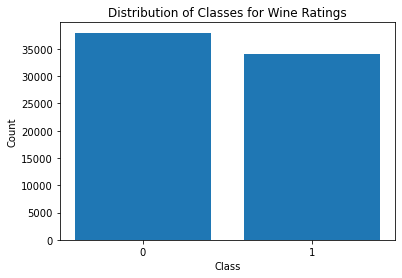

In [190]:
plt.figure()
plt.bar(y_train_final.value_counts().index, y_train_final.value_counts())
plt.xticks(range(0,2))
plt.title('Distribution of Classes for Wine Ratings')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

While we do see a bit of a class imbalance, it is very minimal with class 0 ('bad' wines) being slightly overrepresented in comparison to class 1 ('good' wines). Although I will be building a baseline LogisticRegression model, I will note that if my model were to predict all wines to be in class 0 all of the time, its accuracy score would be just under 53%. Hopefully my baseline logistic regression model will beat this.

### Logistic Regression 

#### Baseline 

In [191]:
#baseline logit
baseline_logit = LogisticRegression(random_state=101)
baseline_logit.fit(X_train_final, y_train_final)

#evaluating the baseline model
print(f'The accuracy score on the train set: {baseline_logit.score(X_train_final, y_train_final)}')
print(f'The accuracy on the remainder set: {baseline_logit.score(X_valid_final, y_valid_final)}')
print(f'The accuracy on the test set: {baseline_logit.score(X_test_final, y_test_final)}')

The accuracy score on the train set: 0.7971996888543171
The accuracy on the remainder set: 0.7953996166347196
The accuracy on the test set: 0.7991915992999417


In [192]:
#creating a funnction that will plot train and validation scores
def plot_accuracy(train_accuracy_scores, test_accuracy_scores, values, title_of_values):

    '''
    This function will plot train and test accuracy scores across a range of values.
    You must input your list of train and test accuracy scores and your range of values (ideally stored in a list).
    You must also input the name of the range of your values for the x-axis label and title of the plot, as a string. 
     
    E.g. plot_accuracy(train_accuracy, test_accuracy, c_range, 'C Values'), where c_range refers to different values 
    of C. This would plot train and test accuracy scores on the same plot with your y axis representing different 
    accuracy scores, and your x axis representing values of C, and allowing you to title your figure. 
    
    Note: the x-axis has a log-scale. 
    
    '''

    plt.figure(figsize=(15,7))
    plt.plot(values, train_accuracy_scores, label='train')
    plt.plot(values, test_accuracy_scores, label='valid')
    plt.legend()
    plt.xscale('log')
    plt.xlabel(title_of_values)
    plt.ylabel('Accuracy Score')
    plt.title(f'Accuracy Scores Across {title_of_values}')
    plt.show()

### Decision Tree Classifier

#### Baseline

In [193]:
dtree_model1 = DecisionTreeClassifier(random_state=100)
dtree_model1.fit(X_train_final, y_train_final)


DecisionTreeClassifier(random_state=100)

In [194]:
print(f'Train accuracy: {dtree_model1.score(X_train_final, y_train_final)}')
print(f'Validation accuracy: {dtree_model1.score(X_valid_final, y_valid_final)}')
print(f'Test accuracy: {dtree_model1.score(X_test_final, y_test_final)}')

Train accuracy: 1.0
Validation accuracy: 0.746062171847654
Test accuracy: 0.7506458871572631


While my baseline logistic regression model certainly outperforms my most basic baseline model as well as my decision tree baseline model which heavily overfit, it does concern me that my test accuracy score of my logistic regression baseline is 0.2 percentage points higher than my train accuracy score. I have gone back and reviewed Part 2 and tried to locate where data leakage could have occurred, but unfortunately I was not able to see any issues with the way I filled nulls or feature engineered (I intentionally split the data before filling nulls and before encoding for this very reason). However, I have not yet scaled my data yet so perhaps we will see a change once I scale. 

I will now run a logistic regression model on scaled data and perform some basic hyperparameter optimization and compare it to a decision tree classifier model with optimized hyperparameters.

<a id="fin"></a>
## 3.2 - Model Optimization

Based on the baseline models, I anticipate that my decision tree classifier will not perform as well as my logistic regression model even when optimized. For this reason, I will try optimizing the decision tree model first, then I will move onto optimizing my logistic regression model.

#### Optimized Decision Tree

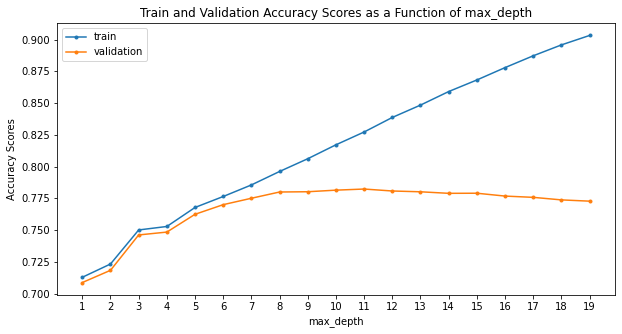

In [195]:

#creating empty lists for scores to be stored
validation_scores = []
train_scores = []

#range of max_depth values for my DT model
max_depth_vals = range(1,20,1)

for i in max_depth_vals:
    
    #instantiate and fit model
    dtree_model = DecisionTreeClassifier(max_depth = i, random_state=100)
    dtree_model.fit(X_train_final, y_train_final)
    
    #scoring and storing scores
    validation_scores.append(dtree_model.score(X_valid_final,y_valid_final))
    train_scores.append(dtree_model.score(X_train_final, y_train_final))

    
#plotting DT scores     
plt.figure(figsize = (10,5))
plt.plot(max_depth_vals, train_scores, label = 'train', marker = '.')
plt.plot(max_depth_vals, validation_scores, label = 'validation', marker = '.')
plt.legend()
plt.title('Train and Validation Accuracy Scores as a Function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy Scores')
plt.xticks(range(1,20,1))
#plt.savefig('accuracy.png')
plt.show()

In [196]:
highest_tree_val = max(validation_scores)

In [197]:
print(f'When max_depth is {max_depth_vals[validation_scores.index(highest_tree_val)]}, we have a train score of {train_scores[validation_scores.index(highest_tree_val)]} and a validation score of {highest_tree_val}')

When max_depth is 11, we have a train score of 0.8272169129903323 and a validation score of 0.7823151929327444


In [198]:
#setting final tree model 

my_final_tree = DecisionTreeClassifier(max_depth = 11, random_state=100)

In [199]:
#fitting and transforming with x remainder. this will take some time 
X_remainder_new, X_test_new, y_remainder_new, y_test_new, tokens_df = fit_transform_remainder_test(X_remainder, X_test, y_remainder, y_test)

In [200]:
#fitting optimized tree model
my_final_tree.fit(X_remainder_new, y_remainder_new)


#evaluating the model
print(f'The accuracy score on the remainder set: {my_final_tree.score(X_remainder_new, y_remainder_new)}')
print(f'The accuracy on the test set: {my_final_tree.score(X_test_new, y_test_new)}')

The accuracy score on the remainder set: 0.827190332326284
The accuracy on the test set: 0.7869405783815318


We still see some overfitting in the optimized tree model (as we likely could have inferred based on the plot above). I will now optimize my logistic regression model and score my model on my remainder and test set. 

#### Optimized Logistic Regression

In [201]:
#scaling the data 
s_scaler = StandardScaler()

X_train_ss = s_scaler.fit_transform(X_train_final)
X_valid_ss = s_scaler.transform(X_valid_final)

#creating a list of values for C to impact the amount of regularization
c_values = [.00001,.0001,.001,.01, .1, 1,10,100,1000]

#creating empty lists for train and test accuracy scores
train_scores = []
val_scores = []

for c in c_values:
    #instantiate model using diff values of C
    logreg_ss_c = LogisticRegression(solver='lbfgs', max_iter=1000, C=c, random_state=1)
    #fit model on scaled train data
    logreg_ss_c.fit(X_train_ss, y_train_final)
    #add scores to scores list
    train_scores.append(logreg_ss_c.score(X_train_ss, y_train_final))
    val_scores.append(logreg_ss_c.score(X_valid_ss, y_valid_final))
    


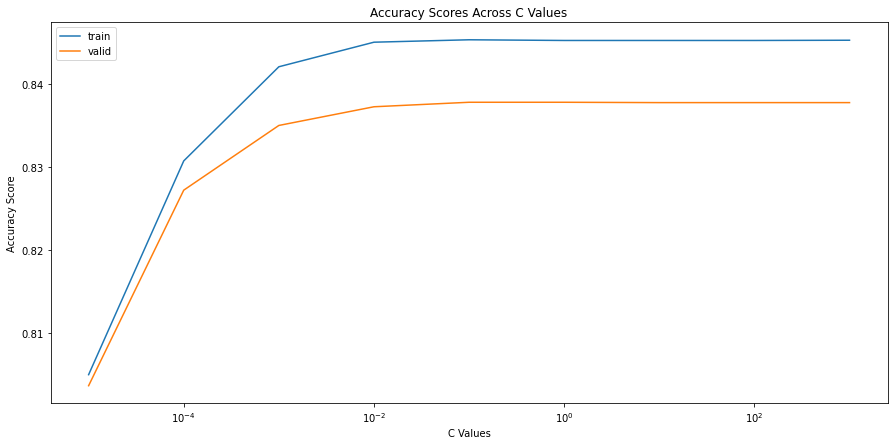

In [202]:
plot_accuracy(train_scores, val_scores, c_values, 'C Values')

In [203]:
#getting the value of train_scores and c_values where val_scores is max
print(f'When C is {c_values[val_scores.index(max(val_scores))]}, we have a train score of {train_scores[val_scores.index(max(val_scores))]} and a validation score of {max(val_scores)}')

When C is 0.1, we have a train score of 0.8453439271030114 and a validation score of 0.8378198183181932


This seems to be a big improvement! I will fit a logistic regression model with optimized hyperparameters to my X_remainder now, and see how it scores on my test set. 

In [204]:
#setting up final logit
my_final_logit = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.1, random_state=1)

In [205]:
#fitting and transforming with x remainder. this will take some time 
#X_remainder_new, X_test_new, y_remainder_new, y_test_new, tokens_df = fit_transform_remainder_test(X_remainder, X_test, y_remainder, y_test)

In [206]:
#checking all numeric
X_remainder_new.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [207]:
#checking all numeric
X_test_new.dtypes.unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [208]:
#looking at token df
tokens_df.head()

,tokens,token_weights
0,10,357.695744
1,100,437.652090
2,2016,394.448442
3,2017,526.304302
4,2018,615.166383


In [209]:
#looking at 20 most important words 
tokens_df.sort_values(by='token_weights', ascending=False).head(20)

,tokens,token_weights
400,wine,6494.169978
137,flavor,5565.062687
152,fruit,5191.654962
8,acid,4088.388415
134,finish,4004.457772
27,aroma,3999.593434
260,palat,3754.033441
110,drink,3564.033575
358,tannin,3522.847928
71,cherri,3490.801489


In [210]:
#look at tail, 20 least imp words
tokens_df.sort_values(by='token_weights', ascending=False).tail(20)

,tokens,token_weights
272,play,328.546692
193,leaf,326.924062
251,old,326.403068
175,highlight,324.681201
406,wrap,320.894536
411,youth,319.427117
138,fleshi,319.182377
277,plush,316.229271
368,tightli,316.144081
124,excel,315.054648


In [211]:
X_remainder_new.isna().sum().sum()

0

In [212]:
X_test_new.isna().sum().sum()

0

In [213]:
from tempfile import mkdtemp

#fit and transform with x remainder (scaler)
X_remainder_ss = s_scaler.fit_transform(X_remainder_new)

#transform test
X_test_ss2 = s_scaler.transform(X_test_new)

In [214]:
#fit
my_final_logit.fit(X_remainder_ss, y_remainder_new)

LogisticRegression(C=0.1, max_iter=1000, random_state=1)

In [215]:
#evaluating the model
print(f'The accuracy score on the train set: {my_final_logit.score(X_remainder_ss, y_remainder_new)}')
print(f'The accuracy on the test set: {my_final_logit.score(X_test_ss2, y_test_new)}')

The accuracy score on the train set: 0.8445671424106678
The accuracy on the test set: 0.8365697141428452


Very happy to see this accuracy score for my test data (and the fact that it isn't outperforming my training accuracy). I will quickly look at the coefficients. 

In [216]:
# creating a df that only contains positive word cols 
final_logit_coef = pd.DataFrame(
    {"coefficients": my_final_logit.coef_[0]},
    index=X_remainder_new.columns
).sort_values("coefficients", ascending=False)

In [217]:
final_logit_coef.head(20)

,coefficients
price_usd,1.690329
word_count,1.019391
onehotencoder__x2_Paul Gregutt,0.288027
onehotencoder__x2_Jeff Jenssen,0.245394
beauti,0.241963
onehotencoder__x2_Anne Krebiehl MW,0.240232
eleg,0.230323
delici,0.221490
rich,0.219875
complex,0.215705


In [218]:
final_logit_coef_copy = final_logit_coef.copy()
for i in final_logit_coef_copy.index:
    if i == 'onehotencoder__x2_Paul Gregutt':
        i = 'x2_Paul Gregutt'
    elif i == 'onehotencoder__x2_Jeff Jenssen':
        i = 'x2_Jeff Jenssen'
    elif i == 'onehotencoder__x2_Sean P. Sullivan':
        i = 'x2_Sean P. Sullivan'
    elif i == 'onehotencoder__x2_Anne Krebiehl MW':
        i = 'x2_Anne Krebiehl MW'
    elif i == 'onehotencoder__x1_Bordeaux':
        i = 'x1_Bordeau'

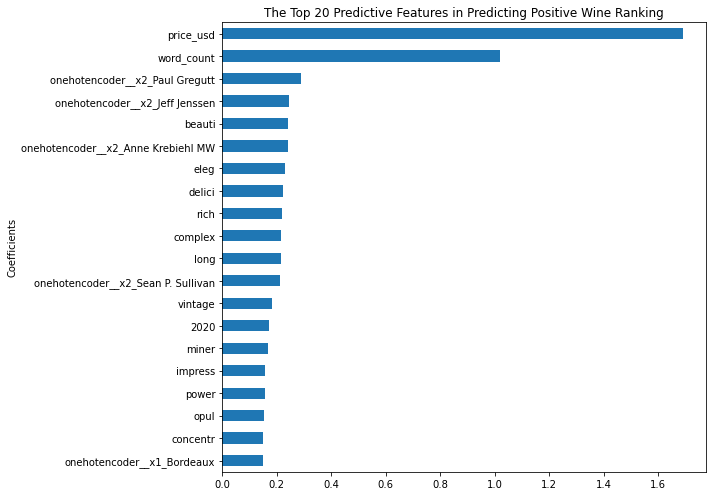

In [219]:
#plotting top highest predictive features 
final_logit_coef_copy.head(20).plot(kind="barh", figsize=(10,7), legend=False)
plt.title("The Top 20 Predictive Features in Predicting Positive Wine Ranking")
plt.ylabel("Coefficients")
plt.xticks()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

If we take a look at the above diagram, we are looking at the top 20 most predictive features in predicting positive wine ranking in my optimized logistic regression model. And if we take a closer look at the second most predictive feature, word_count, that is one of the features I created! While this doesn't directly translate to how well a specific wine bottle will perform in terms of points awarded (especially because word count happens after a wine has already been reviewed), a wine producer would still be able to refer to what grape varieties or characteristics of a wine typically receive longer reviews and use that information to help them decide what varieties/characteristics to focus on. A wine producer or wine retailer would both easily be able to use the features shown above that describe the consistency and flavours of a wine to select what wines to produce or stock (elegant, complex, rich, balanced). 

It appears that our number one predictor of a 'good' wine is the price, after all, and in that case I would recommend that producers aim to sell their wines at slightly higher prices (within reason), and retailers can include the price per bottle when making decisions regarding which wines they should stock/sell. 

We can also see that the year/vintage of the wine (this is not the same as they year it was bottled, this is the year the grapes were harvested) has a positive association with the log odds (and odds ratio) of a wine being ranked positively. This came as a bit of a surprise, as older vintages tend to be more expensive and they are typically very hard to get hold of due to their limited supply. However, it appears that typically speaking, a one unit increase in the standard deviation corresponds to an increase in the log odds of a wine being ranked positively. This is especially important for wine producers and retailers, as wine producers can decide how many bottles/cases they should produce for a specific harvest year, and retailers can use the vintage information when selecting wines to sell and how many units to stock by vintage year. 

In [220]:
final_logit_coef_copy.tail(20)

,coefficients
fruiti,-0.097910
rather,-0.098802
soft,-0.099048
littl,-0.101595
astring,-0.110291
seem,-0.111600
bit,-0.111778
onehotencoder__x1_Arizona,-0.116197
bitter,-0.120251
straightforward,-0.133594


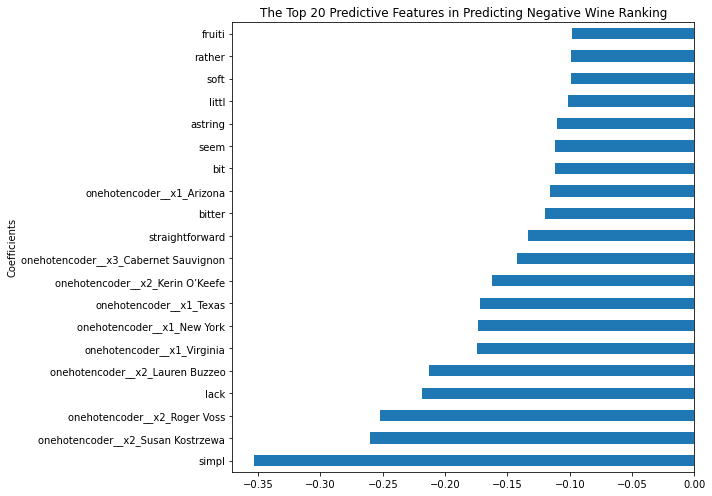

In [221]:
#plotting top highest predictive features 
final_logit_coef_copy.tail(20).plot(kind="barh", figsize=(10,7), legend=False)
plt.title("The Top 20 Predictive Features in Predicting Negative Wine Ranking")
plt.ylabel("Coefficients")
plt.xticks()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

The top features predicting negative wine ranking, on average, do a worse job than the top features predicting positive wine ranking. This should not come as a surprise however, since the lowest score in the dataset was 80 points (Wine Enthusiast only releases reviews for wines which received at least 80 points on a 0-100 scale, meaning that even the 'bad' wines in this dataset, are not actually terrible wines). 

What we can see here is that wines that are described as soft, bitter, straightforward, simple, and lacking, are associated with a decreased log odds in positive sentiment (or conversely, an increase log odds for class 0). More specifically, a one unit increase in the standard deviation of any of those features mentioned, would correspond to a decrease in the log odds of a wine being ranked positively (the decrease in log odds would be equal to their coefficient). This is actually fairly important for wine producers as this demonstrates the relationship between the complexity in a wine's flavour and whether its ranked positively or negatively. Producers of wine could take this information and batch test before committing to a new variety or method of production and avoid a possibly large financial loss if the wine does not perform well due to the simplicity of a wine. 

We can also see here that if a wine is produced in Arizona, Virginia, Texas, or New York, it is more likely to have a low ranking. A unit increase in the standard deviation for any one of these states corresponds to a decrease in the log odds for a positive rank (or alternatively, an increase in the odds ratio for a negative ranking). The climate in these states are not typically optimal for grape harvesting, and these areas are not known for their wines, so we should not be surprised to see this. 

Lastly, I would like to touch on the fact that a unit increase in the standard deviation in the Cabernet Sauvignon feature extracted from the variety, corresponds to a decrease in the log odds for a positive point score. This definitely comes as a surprise to me, as the Cabernet Sauvignon variety is one of the most popular varieties out there. Perhaps due to its popularity, experts tend to have higher expectations of this variety, however it is important to note that the dataset only included 19 wine experts, so its difficult to make a final conclusion without further research.  

---

<a id="pt4"></a>
# Part 4: Conclusion 

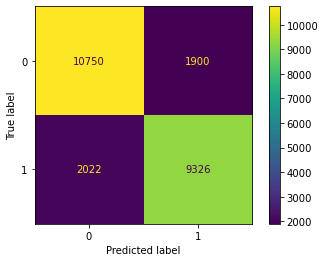

In [222]:
#importing confision matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = my_final_logit.predict(X_test_ss2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_new, y_pred)

plot_confusion_matrix(my_final_logit, X_test_ss2, y_test_new)

In [223]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test_new, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     12650
           1       0.83      0.82      0.83     11348

    accuracy                           0.84     23998
   macro avg       0.84      0.84      0.84     23998
weighted avg       0.84      0.84      0.84     23998



<a id="next"></a>
## Concluding Remarks:

It is clear that the price and the complexity (i.e. boldness, body, and depth, or lack thereof) of a wine impacts whether it will be reviewed positively or negatively. In addition, certain geographic regions (specifically NY, AZ, TX and VA) are associated with lower point scores. As discussed, I would imagine this is heavily related to the weather and the area’s ability to harvest and grow grapes.

The precision and recall scores are very close to my model's overall accuracy score. In fact, my precision accuracy is higher than my recall, which is preferable from a wine producer's perspective, as they'd care more about false positives than negatives. The reason wine producers would value the precision accuracy score more than the recall is that the costs associated with false negatives are not hard costs, they are simply opportunity costs. The costs associated with false positives would cost the producer, distributor or retailer a good chunk of (real) money, which is why they'd look to have a higher precision score. 

## Next steps:

I would really like to optimize my model further and test out a few other classifiers. I would be interested in seeing how my model performs using an XGBoost and RandomForest. I would like to explore the option of running a GridSearch in AWS to further optimize my Logistic Regression model (as well as fit a Random Forest Bagging model and XGBoost Classifier to my data) and hopefully come back with a better accuracy and precision score. 

A second part to this project would be to scrape more recent, unseen data from Wine Enthusiast's website and test my model to see how it performs. 

There is <i>some</i> research that suggests that expert reviews and consumer reviews are fairly similar when it comes to wine ratings (if you're interested, [here](https://www.vox.com/2016/12/15/13892364/wine-scores-critics-amateurs) is a high level, quick read on the topic). With this in mind, I plan to build another classification model to predict positive and negative sentiment for various wines based on <b>consumer </b>reviews, and seeing whether we see similar results and similar trends when it comes to flavour profile and complexity. In the event we find that expert and consumer reviews are not correlated, this may make wine producers, retailers, and importers/distributors refocus their efforts at pleasing those who generate their revenue: the consumers. 

Lastly, I'd like to build a recommendation system, as that would benefit the consumer side, and connect consumers with new varietals, vineyards, and regions they'd possibly never have tried otherwise. 

Feel free to reach out with any questions or feedback - I've linked my [LinkedIn](https://www.linkedin.com/in/jelena-capin) page. Cheers!

In [224]:
#saving unscaled X_remainder_new y_remainder_new as a file
remainder_model_data = X_remainder_new.copy()
remainder_model_data['points'] = y_remainder_new
remainder_model_data.to_csv('capstone_final/remainder_model_data.csv', index=False)

#saving unscaled test model data 2
test_model_data2 = X_test_new.copy()
test_model_data2['points'] = y_test_new
test_model_data2.to_csv('capstone_final/test_model_data2.csv', index=False)